## Project 3

## <em> Classification and inference with machine learning</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

# **Write your partner's name here (if you have one).**

# **NOTE: You can work in pairs and exchange ideas, BUT you must run codes in your colab (or local) environment and submit your own work.**

# **NOTE2: Project 3 is STRICTLY due 11:59pm, 12/16.**


## Partner: Raphael Baer-Way
### Note: Google Colab kicked me off of the GPU allocation due to overuse without paying for pro. This was a common issue amongst students and I discussed with GSI Adrian Bayer, he said it was okay to use my partner's trained model for the last part of Q4 since his was able to finish before Google Colab kicked him off. I have all the relevant code to create the model it just kicked me off the gpu on the 190th iteration layer... If you have questions about this please let me know. 


***
### Mounting Google Drive locally
Mount your Google Drive on your runtime using an authorization code.

Note: When using the 'Mount Drive' button in the file browser, no authentication codes are necessary for notebooks that have only been edited by the current user.

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Imports

In [158]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 18

***

#### Problem 1 - Using Keras - MNIST

The goal of this notebook is to introduce deep neural networks (DNNs) and convolutional neural networks (CNNs) using the high-level Keras package and to become familiar with how to choose its architecture, cost function, and optimizer in Keras. We will also learn how to train neural networks.

We will once again work with the MNIST dataset of hand written digits introduced in earlier HW. The goal is to find a statistical model which recognizes and distinguishes between the ten handwritten digits (0-9).

The MNIST dataset comprises handwritten digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ nuances of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic classification task. 

In this Notebook, we show how to use the Keras python package to tackle the MNIST problem with the help of deep neural networks.

## Creating DNNs with Keras

Constructing a Deep Neural Network to solve ML problems is a multiple-stage process. Quite generally, one can identify the key steps as follows:

* ***step 1:*** Load and process the data
* ***step 2:*** Define the model and its architecture
* ***step 3:*** Choose the optimizer and the cost function
* ***step 4:*** Train the model 
* ***step 5:*** Evaluate the model performance on the *unseen* test data
* ***step 6:*** Modify the hyperparameters to optimize performance for the specific data set

We would like to emphasize that, while it is always possible to view steps 1-5 as independent of the particular task we are trying to solve, it is only when they are put together in ***step 6*** that the real gain of using Deep Learning is revealed, compared to less sophisticated methods such as the regression models. With this remark in mind, we shall focus predominantly on steps 1-5 below. We show how one can use grid search methods to find optimal hyperparameters in ***step 6***.

### Step 1: Load and Process the Data

Keras knows to download automatically the MNIST data from the web. All we need to do is import the `mnist` module and use the `load_data()` class, and it will create the training and test data sets or us.

The MNIST set has pre-defined test and training sets, in order to facilitate the comparison of the performance of different models on the data.

Once we have loaded the data, we need to format it in the correct shape ($({\mathrm{N_{samples}}}, {\mathrm{N_{features}}})$). 

The size of each sample, i.e. the number of bare features used is N_features (whis is 784 because we have a $28 \times 28$ pixel grid), while the number of potential classification categories is "num_classes" (which is 10, number of digits).

Each pixel
contains a greyscale value quantified by an integer between
0 and 255. To standardize the dataset, we normalize
the input data in the interval [0, 1]. 

In [ ]:
!pip install tensorflow==1.15.0
!pip install keras==2.3.0
!pip install scikit-learn==0.19

     |████████████████████████████████| 412.3 MB 25 kB/s 
     |████████████████████████████████| 50 kB 7.6 MB/s 
     |████████████████████████████████| 503 kB 44.5 MB/s 
     |████████████████████████████████| 3.8 MB 47.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=26e709accc4a5c286f50336ab3ad682b5ff9df8e4565a008af8b202592c0dd9e
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [81]:
from __future__ import print_function
import keras,sklearn
# suppress tensorflow compilation warnings
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

from keras.datasets import mnist

# input image dimensions
num_classes = 10 # 10 digits

img_rows, img_cols = 28, 28 # number of pixels 

# the data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train[:40000]
Y_train = Y_train[:40000]

# reshape data, depending on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    
# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255


<span style="color:blue"> <i> 1. Make a plot of one MNIST digit (2D plot using X data - make sure to reshape it into a $28 \times 28$ matrix) and label it (which digit does it correspond to?). </i></span> <br>

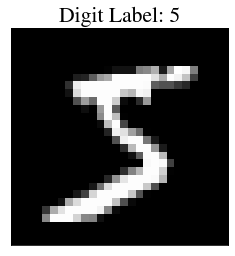

In [82]:
plt.imshow(X_train[0].reshape(28,28), cmap="gray")
plt.title("Digit Label: " + str(Y_train[0]))
plt.xticks([])
plt.yticks([])
plt.show()

Last, we cast the label vectors $y$ to binary class matrices (a.k.a. one-hot format).

In [83]:
# convert class vectors to binary class matrices

print("before conversion - ")
print("y vector : ", Y_train[0:10])

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print("after conversion - ")
print("y vector : ", Y_train[0:10])

before conversion - 
y vector :  [5 0 4 1 9 2 1 3 1 4]
after conversion - 
y vector :  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Here in this template, we use 40000 training samples and 10000 test samples. Remember that we preprocessed data into the shape $({\mathrm{N_{samples}}}, {\mathrm{N_{features}}})$.

In [84]:
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (40000, 784)
Y_train shape: (40000, 10)

40000 train samples
10000 test samples


### Step 2: Define the Neural Net and its Architecture

We can now move on to construct our deep neural net. We shall use Keras's `Sequential()` class to instantiate a model, and will add different deep layers one by one.

Let us create an instance of Keras' `Sequential()` class, called `model`. As the name suggests, this class allows us to build DNNs layer by layer. (https://keras.io/getting-started/sequential-model-guide/)

In [85]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# instantiate model
model = Sequential()

We use the `add()` method to attach layers to our model. For the purposes of our introductory example, it suffices to focus on `Dense` layers for simplicity. (https://keras.io/layers/core/) Every `Dense()` layer accepts as its first required argument an integer which specifies the number of neurons. The type of activation function for the layer is defined using the `activation` optional argument, the input of which is the name of the activation function in `string` format. Examples include `relu`, `tanh`, `elu`, `sigmoid`, `softmax`.

In order for our DNN to work properly, we have to make sure that the numbers of input and output neurons for each layer match. Therefore, we specify the shape of the input in the first layer of the model explicitly using the optional argument `input_shape=(N_features,)`. The sequential construction of the model then allows Keras to infer the correct input/output dimensions of all hidden layers automatically. Hence, we only need to specify the size of the softmax output layer to match the number of categories.

First, add a `Dense` layer with 400 output neurons and `relu` activation function.

In [86]:
model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Add another layer with 100 output neurons. Then, we will apply "dropout," a regularization scheme that has been widely adopted in the neural networks literature: during the training procedure neurons
are randomly “dropped out” of the neural network with some
probability $p$ giving rise to a thinned network. It prevents overfitting by reducing spurious correlations between neurons within the network by introducing
a randomization procedure.

In [87]:
model.add(Dense(100, activation='relu'))
# apply dropout with rate 0.5
model.add(Dropout(0.5))

Lastly, we need to add a soft-max layer since we have a multi-class output.

In [88]:
model.add(Dense(num_classes, activation='softmax'))

### Step 3: Choose the Optimizer and the Cost Function

Next, we choose the loss function according to which to train the DNN. For classification problems, this is the cross entropy, and since the output data was cast in categorical form, we choose the `categorical_crossentropy` defined in Keras' `losses` module. Depending on the problem of interest one can pick any other suitable loss function. To optimize the weights of the net, we choose SGD. This algorithm is already available to use under Keras' `optimizers` module (https://keras.io/optimizers/), but we could use `Adam()` or any other built-in one as well. The parameters for the optimizer, such as `lr` (learning rate) or `momentum` are passed using the corresponding optional arguments of the `SGD()` function. 

While the loss function and the optimizer are essential for the training procedure, to test the performance of the model one may want to look at a particular `metric` of performance. For instance, in categorical tasks one typically looks at their `accuracy`, which is defined as the percentage of correctly classified data points. 

To complete the definition of our model, we use the `compile()` method, with optional arguments for the `optimizer`, `loss`, and the validation `metric` as follows:

In [89]:
# compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])


### Step 4: Train the model

We train our DNN in minibatches. Shuffling the training data during training improves stability of the model. Thus, we train over a number of training epochs. 

(The number of epochs is the number of complete passes through the training dataset, and the batch size is a number of samples propagated through the network before the model is updated.)

Training the DNN is a one-liner using the `fit()` method of the `Sequential` class. The first two required arguments are the training input and output data. As optional arguments, we specify the mini-`batch_size`, the number of training `epochs`, and the test or validation data. To monitor the training procedure for every epoch, we set `verbose=True`. 

Let us set `batch_size` = 64 and `epochs` = 10.

In [90]:
# training parameters
batch_size = 64
epochs = 10

# train DNN and store training info in history
history=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(X_test, Y_test))


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 5s 127us/step - loss: 1.2014 - accuracy: 0.6446 - val_loss: 0.5088 - val_accuracy: 0.8840
Epoch 2/10
40000/40000 [==============================] - 4s 89us/step - loss: 0.5895 - accuracy: 0.8317 - val_loss: 0.3646 - val_accuracy: 0.9064
Epoch 3/10
40000/40000 [==============================] - 4s 90us/step - loss: 0.4755 - accuracy: 0.8650 - val_loss: 0.3082 - val_accuracy: 0.9192
Epoch 4/10
40000/40000 [==============================] - 4s 91us/step - loss: 0.4102 - accuracy: 0.8816 - val_loss: 0.2756 - val_accuracy: 0.9240
Epoch 5/10
40000/40000 [==============================] - 4s 91us/step - loss: 0.3717 - accuracy: 0.8978 - val_loss: 0.2526 - val_accuracy: 0.9288
Epoch 6/10
40000/40000 [==============================] - 4s 106us/step - loss: 0.3445 - accuracy: 0.9031 - val_loss: 0.2338 - val_accuracy: 0.9340
Epoch 7/10
40000/40000 [==============================] - 4s 99us

### Step 5: Evaluate the Model Performance on the *Unseen* Test Data

Next, we evaluate the model and read of the loss on the test data, and its accuracy using the `evaluate()` method.

10000/10000 [==============================] - 0s 47us/step
Test loss: 0.1872626049399376
Test accuracy: 0.945900022983551


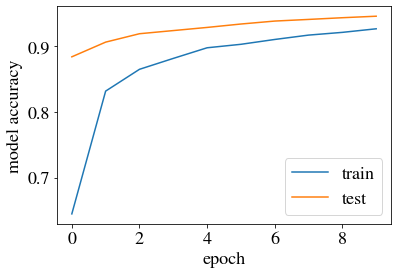

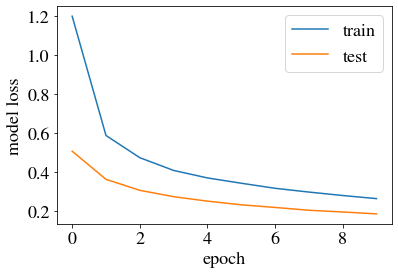

In [91]:
# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)

# print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### Step 6: Modify the Hyperparameters to Optimize Performance of the Model

Last, we show how to use the grid search option of scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to optimize the 
hyperparameters of our model.

First, define a function for crating a DNN:

In [92]:
def create_DNN(optimizer=keras.optimizers.Adam()):
    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

With epochs = 1 and batch_size = 64, do grid search over the following optimization schemes: ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'].

In [93]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

batch_size = 64
epochs = 1
model_gridsearch = KerasClassifier(build_fn=create_DNN, 
                        epochs=epochs, batch_size=batch_size, verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define parameter dictionary
param_grid = dict(optimizer=optimizer)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

Epoch 1/1
10000/10000 [==============================] - 0s 35us/step
Epoch 1/1
10000/10000 [==============================] - 0s 34us/step
Epoch 1/1
10000/10000 [==============================] - 0s 37us/step
Epoch 1/1
10000/10000 [==============================] - 0s 38us/step
Epoch 1/1
10000/10000 [==============================] - 0s 42us/step
Epoch 1/1
10000/10000 [==============================] - 0s 42us/step
Epoch 1/1
10000/10000 [==============================] - 0s 43us/step
Epoch 1/1
10000/10000 [==============================] - 0s 42us/step
Epoch 1/1
10000/10000 [==============================] - 0s 46us/step
Epoch 1/1
10000/10000 [==============================] - 0s 43us/step
Epoch 1/1
10000/10000 [==============================] - 0s 47us/step
Epoch 1/1
10000/10000 [==============================] - 0s 44us/step
Epoch 1/1
10000/10000 [==============================] - 0s 45us/step
Epoch 1/1
10000/10000 [==============================] - 0s 48us/step
Epoch 1/1
10000/1000

Show the mean test score of all optimization schemes and determine which scheme gives the best accuracy.

In [94]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.951625 using {'optimizer': 'Nadam'}
0.850675 (0.013852) with: {'optimizer': 'SGD'}
0.947725 (0.001704) with: {'optimizer': 'RMSprop'}
0.946675 (0.002832) with: {'optimizer': 'Adagrad'}
0.942425 (0.002612) with: {'optimizer': 'Adadelta'}
0.946450 (0.002403) with: {'optimizer': 'Adam'}
0.935275 (0.002534) with: {'optimizer': 'Adamax'}
0.951625 (0.001680) with: {'optimizer': 'Nadam'}


<span style="color:blue"> <i> 2. Create a DNN with one Dense layer having 200 output neurons. Do the grid search over any 5 different activation functions from https://keras.io/activations/. Let epochs = 1, batches = 64, p_dropout=0.5, and optimizer=keras.optimizers.Adam().  Make sure to print the mean test score of each case and determine which activation functions gives the best accuracy. </i></span> <br>


In [95]:
def create_DNN_2(activator):
    optimizer=keras.optimizers.Adam()
    model = Sequential()
    model.add(Dense(200,input_shape=(img_rows*img_cols,), activation=activator))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

In [96]:
batch_size = 64
epochs = 1
model_gridsearch = KerasClassifier(build_fn=create_DNN_2, 
                        epochs=epochs, batch_size=batch_size, verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
activator = ['relu', 'sigmoid', 'softmax', 'softplus', 'tanh']
# define parameter dictionary
param_grid = dict(activator=activator)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

Epoch 1/1
10000/10000 [==============================] - 1s 62us/step
Epoch 1/1
10000/10000 [==============================] - 1s 63us/step
Epoch 1/1
10000/10000 [==============================] - 1s 64us/step
Epoch 1/1
10000/10000 [==============================] - 1s 67us/step
Epoch 1/1
10000/10000 [==============================] - 1s 67us/step
Epoch 1/1
10000/10000 [==============================] - 1s 69us/step
Epoch 1/1
10000/10000 [==============================] - 1s 72us/step
Epoch 1/1
10000/10000 [==============================] - 1s 73us/step
Epoch 1/1
10000/10000 [==============================] - 1s 71us/step
Epoch 1/1
10000/10000 [==============================] - 1s 77us/step
Epoch 1/1
10000/10000 [==============================] - 1s 75us/step
Epoch 1/1
10000/10000 [==============================] - 1s 77us/step
Epoch 1/1
10000/10000 [==============================] - 1s 80us/step
Epoch 1/1
10000/10000 [==============================] - 1s 82us/step
Epoch 1/1
10000/1000

In [97]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.931850 using {'activator': 'relu'}
0.931850 (0.002964) with: {'activator': 'relu'}
0.897400 (0.004611) with: {'activator': 'sigmoid'}
0.794275 (0.048247) with: {'activator': 'softmax'}
0.906975 (0.004745) with: {'activator': 'softplus'}
0.910325 (0.006411) with: {'activator': 'tanh'}


<span style="color:blue"> <i> 3. Now, do the grid search over different combination of batch sizes (10, 30, 50, 100) and number of epochs (1, 2, 5). Use the activation function that gave you the highest accuracy in Part 2. Make sure to print the mean test score of each case and determine which combination of batch size and number of epochs gives the best accuracy. Here, you have a freedom to create your own DNN (assume an arbitrary number of Dense layers, optimization scheme, etc).  </i></span> <br>

Hint: To do the grid search over both batch_size and epochs, you can do:

param_grid = dict(batch_size=batch_size, epochs=epochs)

In [98]:
def create_DNN_3(activator='relu'):
    optimizer=keras.optimizers.Adam()
    model = Sequential()
    model.add(Dense(200,input_shape=(img_rows*img_cols,), activation=activator))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

In [99]:
batch_size = [10,30,50,100]
epochs = [1,2,5]
model_gridsearch = KerasClassifier(build_fn=create_DNN_3, verbose=1)

# # list of allowed optional arguments for the optimizer, see `compile_model()`
# activator = ['relu', 'sigmoid', 'softmax', 'softplus', 'tanh']
# define parameter dictionary
param_grid = dict(batch_size=batch_size, epochs=epochs)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

Epoch 1/1
10000/10000 [==============================] - 2s 234us/step
Epoch 1/1
10000/10000 [==============================] - 2s 236us/step
Epoch 1/1
10000/10000 [==============================] - 2s 241us/step
Epoch 1/1
10000/10000 [==============================] - 3s 251us/step
Epoch 1/2
30000/30000 [==============================] - 14s 475us/step - loss: 0.3889 - accuracy: 0.8818
Epoch 2/2
10000/10000 [==============================] - 2s 248us/step
Epoch 1/2
30000/30000 [==============================] - 15s 496us/step - loss: 0.3863 - accuracy: 0.8827
Epoch 2/2
10000/10000 [==============================] - 3s 251us/step
Epoch 1/2
30000/30000 [==============================] - 30s 1ms/step - loss: 0.3915 - accuracy: 0.8823
Epoch 2/2
10000/10000 [==============================] - 3s 258us/step
Epoch 1/2
30000/30000 [==============================] - 39s 1ms/step - loss: 0.3839 - accuracy: 0.8857
Epoch 2/2
10000/10000 [==============================] - 3s 268us/step
Epoch 1/5
30

In [100]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.967800 using {'batch_size': 10, 'epochs': 5}
0.944800 (0.003484) with: {'batch_size': 10, 'epochs': 1}
0.957775 (0.003460) with: {'batch_size': 10, 'epochs': 2}
0.967800 (0.002041) with: {'batch_size': 10, 'epochs': 5}
0.939425 (0.002744) with: {'batch_size': 30, 'epochs': 1}
0.953775 (0.002480) with: {'batch_size': 30, 'epochs': 2}
0.966425 (0.002579) with: {'batch_size': 30, 'epochs': 5}
0.932800 (0.003096) with: {'batch_size': 50, 'epochs': 1}
0.948025 (0.001052) with: {'batch_size': 50, 'epochs': 2}
0.964300 (0.002986) with: {'batch_size': 50, 'epochs': 5}
0.925400 (0.003086) with: {'batch_size': 100, 'epochs': 1}
0.944050 (0.003064) with: {'batch_size': 100, 'epochs': 2}
0.960225 (0.001630) with: {'batch_size': 100, 'epochs': 5}


<span style="color:blue"> <i> 4. Do the grid search over the number of neurons in the Dense layer and make a plot of mean test score as a function of num_neurons. Again, you have a freedom to create your own DNN. </i></span> <br>

In [101]:
def create_DNN_4(num_neurons):
    optimizer=keras.optimizers.Adam()
    activator='relu'
    model = Sequential()
    model.add(Dense(num_neurons,input_shape=(img_rows*img_cols,), activation=activator))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

In [102]:
batch_size = 64
epochs = 1
model_gridsearch = KerasClassifier(build_fn=create_DNN_4, 
                        epochs=epochs, batch_size=batch_size, verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
num_neurons = [10, 25, 50, 75, 100, 200, 1000]
# define parameter dictionary
param_grid = dict(num_neurons=num_neurons)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

Epoch 1/1
10000/10000 [==============================] - 1s 141us/step
Epoch 1/1
10000/10000 [==============================] - 1s 141us/step
Epoch 1/1
10000/10000 [==============================] - 1s 145us/step
Epoch 1/1
10000/10000 [==============================] - 1s 143us/step
Epoch 1/1
10000/10000 [==============================] - 1s 148us/step
Epoch 1/1
10000/10000 [==============================] - 1s 149us/step
Epoch 1/1
10000/10000 [==============================] - 2s 154us/step
Epoch 1/1
10000/10000 [==============================] - 2s 150us/step
Epoch 1/1
10000/10000 [==============================] - 2s 156us/step
Epoch 1/1
10000/10000 [==============================] - 2s 164us/step
Epoch 1/1
10000/10000 [==============================] - 2s 158us/step
Epoch 1/1
10000/10000 [==============================] - 2s 161us/step
Epoch 1/1
10000/10000 [==============================] - 2s 167us/step
Epoch 1/1
10000/10000 [==============================] - 2s 168us/step
Epoch 

Best: 0.944250 using {'num_neurons': 1000}
0.839825 (0.015848) with: {'num_neurons': 10}
0.888425 (0.008029) with: {'num_neurons': 25}
0.905325 (0.002815) with: {'num_neurons': 50}
0.915875 (0.005121) with: {'num_neurons': 75}
0.920225 (0.003234) with: {'num_neurons': 100}
0.932500 (0.003085) with: {'num_neurons': 200}
0.944250 (0.005628) with: {'num_neurons': 1000}


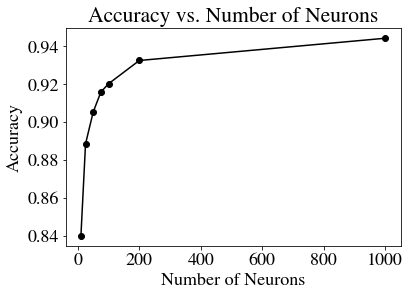

In [103]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


plt.title("Accuracy vs. Number of Neurons")
plt.xlabel("Number of Neurons")
plt.ylabel("Accuracy")
plt.plot(num_neurons, means, 'k-')
plt.plot(num_neurons, means, 'ko')
plt.show()

## Creating CNNs with Keras

We have so far considered each MNIST data sample as a $(28\times 28,)$-long 1d vector. This approach neglects any spatial structure in the image. On the other hand, we do know that in every one of the hand-written digits there are *local* spatial correlations between the pixels, which we would like to take advantage of to improve the accuracy of our classification model. To this end, we first need to reshape the training and test input data as follows

In [104]:
X_train_old, Y_train_old = X_train, Y_train
X_test_old, Y_test_old = X_test, Y_test

print(np.shape(X_train_old))
print(np.shape(Y_train_old))
print(np.shape(X_test_old))
print(np.shape(Y_test_old))

(40000, 784)
(40000, 10)
(10000, 784)
(10000, 10)


In [105]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (40000, 28, 28, 1)
Y_train shape: (40000, 10)

40000 train samples
10000 test samples


One can ask the question of whether a neural net can learn to recognize such local patterns. This can be achieved by using convolutional layers. Luckily, all we need to do is change the architecture of our DNN.

![alt text](https://drive.google.com/uc?id=1ZQFqg-GCRKufS4mMGcluqBquv7yCPKlX)

After we instantiate the model, add the first convolutional layer with 10 filters, which is the dimensionality of output space. (https://keras.io/layers/convolutional/) Here, we will be concerned with local spatial filters
that take as inputs a small spatial patch of the
previous layer at all depths. We consider a three-dimensional kernel of size $5\times5\times1$. Check out this visualization of the
convolution procedure for a square input of unit depth: https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md
The convolution consists of running this filter over all locations
in the spatial plane. After computing the filter, the output is passed through
a non-linearity, a ReLU.

In [106]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(10, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

Subsequently, add a 2D pooling layer. (https://keras.io/layers/pooling/) This pooling layer coarse-grain spatial information by performing
a subsampling at each depth. Here, we use the the max pool operation. In a max pool, the spatial
dimensions are coarse-grained by replacing a small region
(say $2\times2$ neurons) by a single neuron whose output is the
maximum value of the output in the region.

In [107]:
model.add(MaxPooling2D(pool_size=(2, 2)))

Add another convolutional layers with 20 filters and apply dropout. Then, add another pooling layer and flatten the data. You can do DNNs afterwards and compile the model.

In [108]:
# add second convolutional layer with 20 filters
model.add(Conv2D(20, (5, 5), activation='relu'))
# apply dropout with rate 0.5
model.add(Dropout(0.5))
# add 2D pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# flatten data
model.add(Flatten())
# add a dense all-to-all relu layer
model.add(Dense(20*4*4, activation='relu'))
# apply dropout with rate 0.5
model.add(Dropout(0.5))
# soft-max layer
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])


Lastly, train your CNN and evaluate the model.

In [109]:
# training parameters
batch_size = 64
epochs = 10


# train CNN
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 29s 723us/step - loss: 0.3435 - accuracy: 0.8900 - val_loss: 0.1039 - val_accuracy: 0.9761
Epoch 2/10
40000/40000 [==============================] - 26s 655us/step - loss: 0.1165 - accuracy: 0.9640 - val_loss: 0.0754 - val_accuracy: 0.9825
Epoch 3/10
40000/40000 [==============================] - 26s 655us/step - loss: 0.0853 - accuracy: 0.9739 - val_loss: 0.0539 - val_accuracy: 0.9871
Epoch 4/10
40000/40000 [==============================] - 26s 650us/step - loss: 0.0722 - accuracy: 0.9778 - val_loss: 0.0536 - val_accuracy: 0.9868
Epoch 5/10
40000/40000 [==============================] - 26s 654us/step - loss: 0.0615 - accuracy: 0.9802 - val_loss: 0.0397 - val_accuracy: 0.9880
Epoch 6/10
40000/40000 [==============================] - 26s 652us/step - loss: 0.0543 - accuracy: 0.9833 - val_loss: 0.0382 - val_accuracy: 0.9903
Epoch 7/10
40000/40000 [==============================] 

<span style="color:blue"> <i> 5. Do the grid search over any 3 different optimization schemes and 2 activation functions. Suppose that we have a 2 convolutional layers with 10 neurons. Let p_dropout = 0.5, epochs = 1, and batch_size = 64. Determine which combination of optimization scheme and activation function gives the best accuracy. </i></span> <br>

In [110]:
def create_CNN(optimizer, activator):
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5),
                 activation=activator,
                 input_shape=input_shape))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # add second convolutional layer with 20 filters
    model.add(Conv2D(20, (5, 5), activation=activator))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # add 2D pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # flatten data
    model.add(Flatten())
    # add a dense all-to-all relu layer
    model.add(Dense(20*4*4, activation=activator))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))

    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return model

In [111]:
# training parameters
batch_size = 64
epochs = 1

model_gridsearch = KerasClassifier(build_fn=create_CNN, epochs=epochs, batch_size=batch_size, verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
activator = ['relu', 'sigmoid']
optimizer = ['Adam', 'SGD', 'Nadam']
# define parameter dictionary
param_grid = dict(activator=activator, optimizer=optimizer)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

Epoch 1/1
10000/10000 [==============================] - 4s 391us/step
Epoch 1/1
10000/10000 [==============================] - 9s 853us/step
Epoch 1/1
10000/10000 [==============================] - 9s 854us/step
Epoch 1/1
10000/10000 [==============================] - 4s 392us/step
Epoch 1/1
10000/10000 [==============================] - 8s 843us/step
Epoch 1/1
10000/10000 [==============================] - 4s 400us/step
Epoch 1/1
10000/10000 [==============================] - 4s 401us/step
Epoch 1/1
10000/10000 [==============================] - 4s 411us/step
Epoch 1/1
10000/10000 [==============================] - 8s 831us/step
Epoch 1/1
10000/10000 [==============================] - 4s 418us/step
Epoch 1/1
10000/10000 [==============================] - 8s 831us/step
Epoch 1/1
10000/10000 [==============================] - 4s 422us/step
Epoch 1/1
10000/10000 [==============================] - 4s 429us/step
Epoch 1/1
10000/10000 [==============================] - 4s 422us/step
Epoch 

In [112]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("\n\nactivator: relu and Optimizer: Nadam yields the highest accuracy!")

Best: 0.973725 using {'activator': 'relu', 'optimizer': 'Nadam'}
0.968025 (0.002199) with: {'activator': 'relu', 'optimizer': 'Adam'}
0.896700 (0.013806) with: {'activator': 'relu', 'optimizer': 'SGD'}
0.973725 (0.002449) with: {'activator': 'relu', 'optimizer': 'Nadam'}
0.864650 (0.009782) with: {'activator': 'sigmoid', 'optimizer': 'Adam'}
0.112225 (0.003386) with: {'activator': 'sigmoid', 'optimizer': 'SGD'}
0.909925 (0.013382) with: {'activator': 'sigmoid', 'optimizer': 'Nadam'}


activator: relu and Optimizer: Nadam yields the highest accuracy!


<span style="color:blue"> <i> 6. Create an arbitrary DNN (you are free to choose any activation function, optimization scheme, etc) and evaluate its performance. Then, add two convolutional layers and pooling layers and evaluate its performance again. How do they compare? </i></span> <br>

In [113]:
def create_DNN_no_CNN():
    optimizer='Nadam'
    activator='relu'

    model = Sequential()
    model.add(Dense(20*4*4, input_shape=(img_rows*img_cols,), activation=activator))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

def create_DNN_with_CNN():
    optimizer='Nadam'
    activator='relu'

    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5),
                 activation=activator,
                 input_shape=input_shape))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # add second convolutional layer with 20 filters
    model.add(Conv2D(20, (5, 5), activation=activator))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # add 2D pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # flatten data
    model.add(Flatten())
    # add a dense all-to-all relu layer
    model.add(Dense(20*4*4, activation=activator))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))

    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return model


In [114]:
#training parameters
batch_size = 64
epochs = 5

#create models
model_no_CNN = create_DNN_no_CNN()
model_with_CNN = create_DNN_with_CNN()

#train NNs
model_no_CNN.fit(X_train_old, Y_train_old,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_old, Y_test_old))

model_with_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))



Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 12s 309us/step - loss: 0.3319 - accuracy: 0.8992 - val_loss: 0.1374 - val_accuracy: 0.9587
Epoch 2/5
40000/40000 [==============================] - 9s 229us/step - loss: 0.1702 - accuracy: 0.9476 - val_loss: 0.1022 - val_accuracy: 0.9681
Epoch 3/5
40000/40000 [==============================] - 9s 231us/step - loss: 0.1360 - accuracy: 0.9574 - val_loss: 0.0903 - val_accuracy: 0.9726
Epoch 4/5
40000/40000 [==============================] - 9s 233us/step - loss: 0.1144 - accuracy: 0.9653 - val_loss: 0.0840 - val_accuracy: 0.9743
Epoch 5/5
40000/40000 [==============================] - 9s 229us/step - loss: 0.1004 - accuracy: 0.9675 - val_loss: 0.0850 - val_accuracy: 0.9753
Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 31s 773us/step - loss: 0.2401 - accuracy: 0.9244 - val_loss: 0.0743 - val_accuracy: 0.9826
Epoch 2/5
40000/

In [115]:
# evaluate models
score_no_CNN = model_no_CNN.evaluate(X_test_old, Y_test_old, verbose=1)
score_with_CNN = model_with_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print("No CNN")
print('Test loss:', score_no_CNN[0])
print('Test accuracy:', score_no_CNN[1])

print("With CNN")
print('Test loss:', score_with_CNN[0])
print('Test accuracy:', score_with_CNN[1])

print("\nWe see that while they are both great, including convolution and pooling is more accurate than without!")

10000/10000 [==============================] - 4s 374us/step
No CNN
Test loss: 0.08496940702719148
Test accuracy: 0.9753000140190125
With CNN
Test loss: 0.03268398701720871
Test accuracy: 0.9900000095367432

We see that while they are both great, including convolution and pooling is more accurate than without!


#### Problem 2 - Using Tensorflow - Ising Model

Next, we show how one can use deep neural nets to classify the states of the 2D Ising model according to their phase. This should be compared with the use of logistic-regression in earlier HW.

The Hamiltonian for the classical Ising model is given by

$$ H = -J\sum_{\langle ij\rangle}S_{i}S_j,\qquad \qquad S_j\in\{\pm 1\} $$

where the lattice site indices $i,j$ run over all nearest neighbors of a 2D square lattice, and $J$ is some arbitrary interaction energy scale. We adopt periodic boundary conditions. Onsager proved that this model undergoes a phase transition in the thermodynamic limit from an ordered ferromagnet with all spins aligned to a disordered phase at the critical temperature $T_c/J=2/\log(1+\sqrt{2})\approx 2.26$. For any finite system size, this critical point is expanded to a critical region around $T_c$.

### Step 1: Load and Process the Data

We begin by writing a `DataSet` class and two functions `read_data_sets` and `load_data` to process the 2D Ising data. 

The `DataSet` class performs checks on the data shape and casts the data into the correct data type for the calculation. It contains a function method called `next_batch` which shuffles the data and returns a mini-batch of a pre-defined size. This structure is particularly useful for the training procedure in TensorFlow.

In [116]:
# -*- coding: utf-8 -*-
from __future__ import absolute_import, division, print_function
import numpy as np
seed=12
np.random.seed(seed)
import sys, os, argparse
import tensorflow as tf
from tensorflow.python.framework import dtypes
# suppress tflow compilation warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

tf.set_random_seed(seed)

In [117]:
class DataSet(object):

    def __init__(self,data_X,data_Y,dtype=dtypes.float32):
        """Checks data and casts it into correct data type. """

        dtype = dtypes.as_dtype(dtype).base_dtype
        if dtype not in (dtypes.uint8, dtypes.float32):
            raise TypeError('Invalid dtype %r, expected uint8 or float32' % dtype)

        assert data_X.shape[0] == data_Y.shape[0], ('data_X.shape: %s data_Y.shape: %s' % (data_X.shape, data_Y.shape))
        self.num_examples = data_X.shape[0]

        if dtype == dtypes.float32:
            data_X = data_X.astype(np.float32)
        self.data_X = data_X
        self.data_Y = data_Y 

        self.epochs_completed = 0
        self.index_in_epoch = 0

    def next_batch(self, batch_size, seed=None):
        """Return the next `batch_size` examples from this data set."""

        if seed:
            np.random.seed(seed)

        start = self.index_in_epoch
        self.index_in_epoch += batch_size
        if self.index_in_epoch > self.num_examples:
            # Finished epoch
            self.epochs_completed += 1
            # Shuffle the data
            perm = np.arange(self.num_examples)
            np.random.shuffle(perm)
            self.data_X = self.data_X[perm]
            self.data_Y = self.data_Y[perm]
            # Start next epoch
            start = 0
            self.index_in_epoch = batch_size
            assert batch_size <= self.num_examples
        end = self.index_in_epoch

        return self.data_X[start:end], self.data_Y[start:end]

Now, load the Ising dataset, and splits it into three subsets: ordered, critical and disordered, depending on the temperature which sets the distribution they are drawn from. Once again, we use the ordered and disordered data to create a training and a test data set for the problem. Classifying the states in the critical region is expected to be harder and we only use this data to test the performance of our model in the end.

In [118]:

import pickle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import collections

L=40 # linear system size

# load data
fac = 25
file_name = "/content/drive/My Drive/P188_288/P188_288_Project3/Ising2DFM_reSample_L40_T=All.pkl" # this file contains 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25)
data = pickle.load(open(file_name,'rb')) # pickle reads the file and returns the Python object (1D array, compressed bits)
data = data[::fac]
data = np.unpackbits(data).reshape(-1, 1600) # Decompress array and reshape for convenience
data=data.astype('int')
data[np.where(data==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)

file_name = "/content/drive/My Drive/P188_288/P188_288_Project3/Ising2DFM_reSample_L40_T=All_labels.pkl" # this file contains 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25)
labels = pickle.load(open(file_name,'rb')) # pickle reads the file and returns the Python object (here just a 1D array with the binary labels)

# divide data into ordered, critical and disordered
X_ordered=data[:int(70000/fac),:]
Y_ordered=labels[:70000][::fac]

X_critical=data[int(70000/fac):int(100000/fac),:]
Y_critical=labels[70000:100000][::fac]

X_disordered=data[int(100000/fac):,:]
Y_disordered=labels[100000:][::fac]

del data,labels

# define training and test data sets
X=np.concatenate((X_ordered,X_disordered)) #np.concatenate((X_ordered,X_critical,X_disordered))
Y=np.concatenate((Y_ordered,Y_disordered)) #np.concatenate((Y_ordered,Y_critical,Y_disordered))

del X_ordered, X_disordered, Y_ordered, Y_disordered


In [119]:
# pick random data points from ordered and disordered states to create the training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.6)


# make data categorical
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)
Y_critical=to_categorical(Y_critical)


# create data sets
train = DataSet(X_train, Y_train, dtype=dtypes.float32)
test = DataSet(X_test, Y_test, dtype=dtypes.float32)
critical = DataSet(X_critical, Y_critical, dtype=dtypes.float32)

Datasets = collections.namedtuple('Datasets', ['train', 'test', 'critical'])
Dataset = Datasets(train=train, test=test, critical=critical)

You can load the training data in the following way: (Dataset.train.data_X, Dataset.train.data_Y).

### Steps 2+3: Define the Neural Net and its Architecture, Choose the Optimizer and the Cost Function

We can now move on to construct our deep neural net using TensorFlow. 

Unique for TensorFlow is creating placeholders for the variables of the model, such as the feed-in data `X` and `Y` or the dropout probability `dropout_keepprob` (which has to be set to unity explicitly during testing). Another peculiarity is using the `with` scope to give names to the most important operators. While we do not discuss this here, TensorFlow also allows one to visualise the computational graph for the model (see package documentation on [https://www.tensorflow.org/](https://www.tensorflow.org/)).

The shape of X is only partially defined. We know that it will be a matrix, with instances along the first dimension and features along the second dimension, and we know that the number of features is going to be $28\times28$, but we don't know yet how many instances each training batch will contain. So the shape of X is (None, n_inputs). Similarly, we know that Y will be a vector with one entry per instance, but again we don't know the size of the training batch, so the shape is (None).

In [120]:
L=40 # system linear size
n_feats=L**2 # 40x40 square lattice
n_categories=2 # 2 Ising phases: ordered and disordered

n_hidden1 = 300
n_hidden2 = 100
n_outputs = 2

with tf.name_scope('data'):
    X=tf.placeholder(tf.float32, shape=(None,n_feats))
    Y=tf.placeholder(tf.float32, shape=(None,n_categories))
    dropout_keepprob=tf.placeholder(tf.float32)


To classify whether a given spin configuration is in the ordered or disordered phase, we construct a minimalistic model for a DNN with a single hidden layer containing $N_\mathrm{neurons}$ (which is kept variable so we can try out the performance of different sizes for the hidden layer). 

Let us use a neuron_layer() function to create layers in the neural nets.

1. First, create a name scope using the name of the layer.
2. Get the number of inputs by looking up the input matrix's shape and getting the size of the second dimension.
3. Create a $W$ variable which holds the weight matrix (i.e. kernel).  Initialize it randomly, using a truncated normal distribution. 
4. Create a $b$ variable for biases, initialized to 0.
5. Create a subgraph to compute $Z=XW+b$
6. Use activation function if provided.

In [121]:
def neuron_layer(X, n_neuron, name, activation = None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs + n_neuron)
        init = tf.truncated_normal((n_inputs, n_neuron), stddev = stddev)
        W = tf.Variable(init, name = "kernel")
        b = tf.Variable(tf.zeros([n_neuron]), name = "bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

Using a neuron_layer() function, create two hidden layers and an output layer. The first hidden layer takes X as its input, and the second takes the output of the first hidden layer as its input. Finally, the output layer takes the output of the second hidden layer as its input.


In [122]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


Then, define the cost function that we will use to train the neural net model. Here, use the cross entropy to penalize models that estimate a low probability for the target class.

In [123]:
with tf.name_scope('loss'):
    xentropy = tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits)
    loss = tf.reduce_mean(xentropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Then, define a GradientDescentOptimizer that will tweak the model parameters to minimize the cost function. Now, set learning_rate = 1e-6. 

In [124]:
learning_rate = 1e-6
with tf.name_scope('optimiser'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss) 
    

Lastly, specify how to evaluate the model. Let us simply use accuracy as our performance measure.

In [125]:

with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1))
    correct_prediction = tf.cast(correct_prediction, tf.float64) # change data type
#     correct_prediction = tf.nn.in_top_k(logits, Y, 1)
    accuracy = tf.reduce_mean(correct_prediction)
    

### Steps 4+5: Train the Model and Evaluate its Performance

We train our DNN using mini-batches of size $100$ over a total of $100$ epochs, which we define first. We then set up the optimizer parameter dictionary `opt_params`, and use it to create a DNN model. 

Running TensorFlow requires opening up a `Session` which we abbreviate as `sess` for short. All operations are performed in this session by calling the `run` method. First, we initialize the global variables in TensorFlow's computational graph by running the `global_variables_initializer`. To train the DNN, we loop over the number of epochs. In each fix epoch, we use the `next_batch` function of the `DataSet` class we defined above to create a mini-batch. The forward and backward passes through the weights are performed by running the `loss` and `optimizer` methods. To pass the mini-batch as well as any other external parameters, we use the `feed_dict` dictionary. Similarly, we evaluate the model performance, by getting `accuracy` on the same minibatch data. Note that the dropout probability for testing is set to unity. 

Once we have exhausted all training epochs, we test the final performance on the entire training, test and critical data sets. This is done in the same way as above.

Last, we return the loss and accuracy for each of the training, test and critical data sets.

In [126]:
training_epochs=100
batch_size=100

with tf.Session() as sess:

    # initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())

    # train the DNN
    for epoch in range(training_epochs): 

        batch_X, batch_Y = Dataset.train.next_batch(batch_size)

        sess.run(optimizer, feed_dict={X: batch_X,Y: batch_Y,dropout_keepprob: 0.5})
        

    # test DNN performance on entire train test and critical data sets
    train_loss, train_accuracy = sess.run([loss, accuracy], 
                                                feed_dict={X: Dataset.train.data_X, 
                                                           Y: Dataset.train.data_Y,
                                                           dropout_keepprob: 0.5}
                                                            )
    print("train loss/accuracy:", train_loss, train_accuracy)

    test_loss, test_accuracy = sess.run([loss, accuracy], 
                                                feed_dict={X: Dataset.test.data_X,
                                                           Y: Dataset.test.data_Y,
                                                           dropout_keepprob: 1.0}
                                                           )

    print("test loss/accuracy:", test_loss, test_accuracy)

    critical_loss, critical_accuracy = sess.run([loss, accuracy], 
                                                feed_dict={X: Dataset.critical.data_X,
                                                           Y: Dataset.critical.data_Y,
                                                           dropout_keepprob: 1.0}
                                                           )
    print("crtitical loss/accuracy:", critical_loss, critical_accuracy)



train loss/accuracy: 0.9268221 0.5176282051282052
test loss/accuracy: 0.96074164 0.4966346153846154
crtitical loss/accuracy: 0.7648471 0.6175


### Step 6: Modify the Hyperparameters to Optimize Performance of the Model

To study the dependence of our DNN on some of the hyperparameters, we do a grid search over the number of neurons (initially set as 100) in the hidden layer, and different SGD learning rates (initially set as 1e-6). These searches are best done over logarithmically-spaced points. 

To do this, define a function for creating a DNN model: `create_DNN` and for evaluating the performance: `evaluate_model`.

The function `grid_search` will output 2D heat map to show how accuracy changes with learning rate and number of neurons. 

In [127]:
def create_DNN(n_hidden1=100, n_hidden2=100, learning_rate=1e-6):
    with tf.name_scope('data'):
        X=tf.placeholder(tf.float32, shape=(None,n_feats))
        Y=tf.placeholder(tf.float32, shape=(None,n_categories))
        dropout_keepprob=tf.placeholder(tf.float32)

    with tf.name_scope("dnn"):
        hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu)
        hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu)
        logits = tf.layers.dense(hidden2, n_outputs)
        
    with tf.name_scope('loss'):
        xentropy = tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits)
        loss = tf.reduce_mean(xentropy)
        
    with tf.name_scope('optimiser'):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss) 

    with tf.name_scope('accuracy'):
        correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1))
        correct_prediction = tf.cast(correct_prediction, tf.float64) # change data type
    #     correct_prediction = tf.nn.in_top_k(logits, Y, 1)
        accuracy = tf.reduce_mean(correct_prediction)
        
    return X, Y, dropout_keepprob, loss, optimizer, accuracy


In [128]:
def evaluate_model(neurons,lr):
    
    training_epochs=100
    batch_size=100


    X, Y, dropout_keepprob, loss, optimizer, accuracy = create_DNN(n_hidden1=neurons, n_hidden2=neurons, learning_rate=lr)
    with tf.Session() as sess:

        # initialize the necessary variables, in this case, w and b
        sess.run(tf.global_variables_initializer())

        # train the DNN
        for epoch in range(training_epochs): 

            batch_X, batch_Y = Dataset.train.next_batch(batch_size)

            sess.run(optimizer, feed_dict={X: batch_X,Y: batch_Y,dropout_keepprob: 0.5})


        # test DNN performance on entire train test and critical data sets
        train_loss, train_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.train.data_X, 
                                                               Y: Dataset.train.data_Y,
                                                               dropout_keepprob: 0.5}
                                                                )
        print("train loss/accuracy:", train_loss, train_accuracy)

        test_loss, test_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.test.data_X,
                                                               Y: Dataset.test.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )

        print("test loss/accuracy:", test_loss, test_accuracy)

        critical_loss, critical_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.critical.data_X,
                                                               Y: Dataset.critical.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )
        print("crtitical loss/accuracy:", critical_loss, critical_accuracy)

    return train_loss,train_accuracy,test_loss,test_accuracy,critical_loss,critical_accuracy

In [129]:
def grid_search():
    """This function performs a grid search over a set of different learning rates 
    and a number of hidden layer neurons."""

    # perform grid search over learnign rate and number of hidden neurons
    N_neurons=[100, 200, 300, 400, 500]
    learning_rates=np.logspace(-6,-1,6)

    # pre-alocate variables to store accuracy and loss data
    train_loss=np.zeros((len(N_neurons),len(learning_rates)),dtype=np.float64)
    train_accuracy=np.zeros_like(train_loss)
    test_loss=np.zeros_like(train_loss)
    test_accuracy=np.zeros_like(train_loss)
    critical_loss=np.zeros_like(train_loss)
    critical_accuracy=np.zeros_like(train_loss)

    # do grid search
    for i, neurons in enumerate(N_neurons):
        for j, lr in enumerate(learning_rates):

            print("training DNN with %4d neurons and SGD lr=%0.6f." %(neurons,lr) )

            train_loss[i,j],train_accuracy[i,j],\
            test_loss[i,j],test_accuracy[i,j],\
            critical_loss[i,j],critical_accuracy[i,j] = evaluate_model(neurons,lr)

    %matplotlib inline
    plot_data(learning_rates,N_neurons,train_accuracy, "training data")
    plot_data(learning_rates,N_neurons,test_accuracy, "test data")
    plot_data(learning_rates,N_neurons,critical_accuracy, "critical data")

In [130]:
%matplotlib notebook
import matplotlib.pyplot as plt

def plot_data(x,y,data, title):

    # plot results
    fontsize=16


    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=1)
    fig.colorbar(cax)

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.1f}\\%$".format( 100*data[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center')

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str(i) for i in y]


    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(['']+y)

    ax.set_xlabel('$\\mathrm{learning\\ rate}$',fontsize=fontsize)
    ax.set_ylabel('$\\mathrm{hidden\\ neurons}$',fontsize=fontsize)
    
    ax.set_title(title,fontsize=fontsize)

    plt.tight_layout()

    plt.show()

training DNN with  100 neurons and SGD lr=0.000001.
train loss/accuracy: 0.75802207 0.5413461538461538
test loss/accuracy: 0.7160004 0.5668269230769231
crtitical loss/accuracy: 0.7569941 0.5391666666666667
training DNN with  100 neurons and SGD lr=0.000010.
train loss/accuracy: 0.7985771 0.4971153846153846
test loss/accuracy: 0.79959315 0.48509615384615384
crtitical loss/accuracy: 0.8168683 0.48
training DNN with  100 neurons and SGD lr=0.000100.
train loss/accuracy: 1.3432103 0.4519230769230769
test loss/accuracy: 1.3001877 0.4735576923076923
crtitical loss/accuracy: 1.6341498 0.33416666666666667
training DNN with  100 neurons and SGD lr=0.001000.
train loss/accuracy: 0.69605464 0.5769230769230769
test loss/accuracy: 0.6967438 0.5725961538461538
crtitical loss/accuracy: 0.6691293 0.6025
training DNN with  100 neurons and SGD lr=0.010000.
train loss/accuracy: 0.24631707 0.9631410256410257
test loss/accuracy: 0.2885282 0.9375
crtitical loss/accuracy: 0.47828683 0.7908333333333334
traini

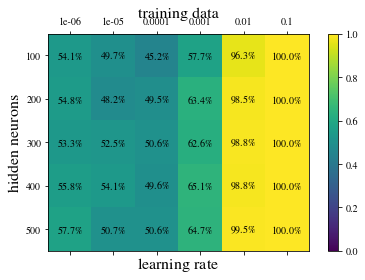

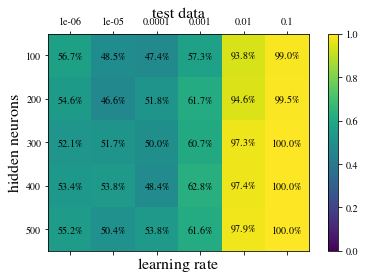

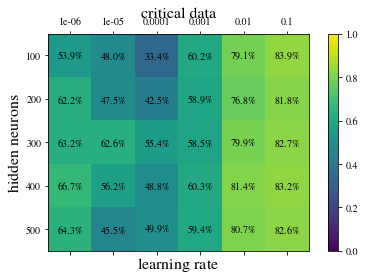

In [131]:
grid_search()

<span style="color:blue"> <i> 1. Do the grid search over 5 different types of activation functions (https://www.tensorflow.org/api_guides/python/nn#Activation_Functions). Evaluate the performance for each case and determine which gives the best accuracy. You can assume an arbitrary DNN. Show results for training, test, and critical data. </i></span> <br>

In [133]:
def create_DNN(activator,n_hidden1=100, n_hidden2=100, learning_rate=1e-6):
    with tf.name_scope('data'):
        X=tf.placeholder(tf.float32, shape=(None,n_feats))
        Y=tf.placeholder(tf.float32, shape=(None,n_categories))
        dropout_keepprob=tf.placeholder(tf.float32)

    with tf.name_scope("dnn"):
        hidden1 = tf.layers.dense(X, n_hidden1, activation = activator)
        hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = activator)
        logits = tf.layers.dense(hidden2, n_outputs)
        
    with tf.name_scope('loss'):
        xentropy = tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits)
        loss = tf.reduce_mean(xentropy)
        
    with tf.name_scope('optimiser'):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss) 

    with tf.name_scope('accuracy'):
        correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1))
        correct_prediction = tf.cast(correct_prediction, tf.float64) # change data type
    #     correct_prediction = tf.nn.in_top_k(logits, Y, 1)
        accuracy = tf.reduce_mean(correct_prediction)
        
    return X, Y, dropout_keepprob, loss, optimizer, accuracy

def evaluate_model(neurons,lr,activator):
    
    training_epochs=100
    batch_size=100


    X, Y, dropout_keepprob, loss, optimizer, accuracy = create_DNN(activator,n_hidden1=neurons, n_hidden2=neurons, learning_rate=lr)
    with tf.Session() as sess:

        # initialize the necessary variables, in this case, w and b
        sess.run(tf.global_variables_initializer())

        # train the DNN
        for epoch in range(training_epochs): 

            batch_X, batch_Y = Dataset.train.next_batch(batch_size)

            sess.run(optimizer, feed_dict={X: batch_X,Y: batch_Y,dropout_keepprob: 0.5})


        # test DNN performance on entire train test and critical data sets
        train_loss, train_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.train.data_X, 
                                                               Y: Dataset.train.data_Y,
                                                               dropout_keepprob: 0.5}
                                                                )
        print("train loss/accuracy:", train_loss, train_accuracy)

        test_loss, test_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.test.data_X,
                                                               Y: Dataset.test.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )

        print("test loss/accuracy:", test_loss, test_accuracy)

        critical_loss, critical_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.critical.data_X,
                                                               Y: Dataset.critical.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )
        print("crtitical loss/accuracy:", critical_loss, critical_accuracy)

    return train_loss,train_accuracy,test_loss,test_accuracy,critical_loss,critical_accuracy

def grid_search_2():
    """This function performs a grid search over a set of different learning rates 
    and a number of hidden layer neurons."""

    # perform grid search over activators
    neurons=200
    lr = 1e-2
    activators=[tf.nn.relu, tf.nn.tanh, tf.nn.sigmoid, tf.nn.swish, tf.nn.selu]
    names = ['relu', 'tanh', 'sigmoid', 'swish', 'selu']

    # pre-alocate variables to store accuracy and loss data
    train_loss=np.zeros(len(names),dtype=np.float64)
    train_accuracy=np.zeros_like(train_loss)
    test_loss=np.zeros_like(train_loss)
    test_accuracy=np.zeros_like(train_loss)
    critical_loss=np.zeros_like(train_loss)
    critical_accuracy=np.zeros_like(train_loss)

    # do grid search
    for i in range(len(names)):
      print("training DNN with " + names[i])
      activator = activators[i]
      train_loss[i],train_accuracy[i],\
      test_loss[i],test_accuracy[i],\
      critical_loss[i],critical_accuracy[i] = evaluate_model(neurons,lr, activator)

    return train_accuracy, test_accuracy, critical_accuracy

    

In [134]:
train_accuracy, test_accuracy, critical_accuracy = grid_search_2()

training DNN with relu
train loss/accuracy: 0.19684711 0.9826923076923076
test loss/accuracy: 0.24493705 0.9509615384615384
crtitical loss/accuracy: 0.44932982 0.7958333333333333
training DNN with tanh
train loss/accuracy: 0.6558438 0.6458333333333334
test loss/accuracy: 0.7465794 0.5432692307692307
crtitical loss/accuracy: 0.7354325 0.5525
training DNN with sigmoid
train loss/accuracy: 0.6902393 0.5384615384615384
test loss/accuracy: 0.6953029 0.5033653846153846
crtitical loss/accuracy: 0.6742065 0.5991666666666666
training DNN with swish
train loss/accuracy: 0.26412037 0.9631410256410257
test loss/accuracy: 0.29448724 0.9427884615384615
crtitical loss/accuracy: 0.4480009 0.8108333333333333
training DNN with selu
train loss/accuracy: 0.26272583 0.9243589743589744
test loss/accuracy: 0.4303273 0.8211538461538461
crtitical loss/accuracy: 0.5393117 0.7533333333333333


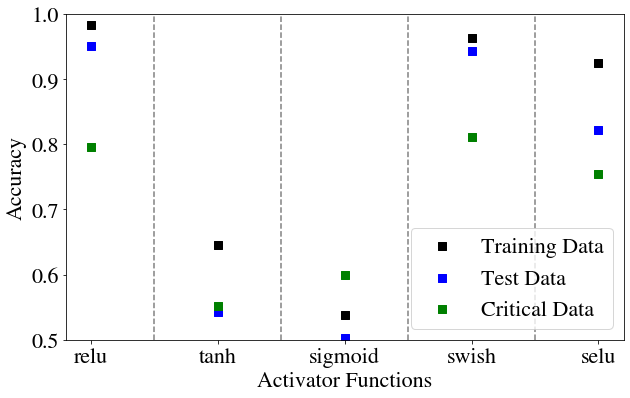

In [160]:
%matplotlib inline
plt.rcParams['font.size'] = 22
names = ['relu', 'tanh', 'sigmoid', 'swish', 'selu']

f, (ax1) = plt.subplots(figsize=(10,6))

# ax1.plot(list(range(5)), train_accuracy, color="black", )
ax1.scatter(list(range(5)), train_accuracy, color="black",marker="s",s=50,label="Training Data")
# ax1.plot(list(range(5)), test_accuracy, color="blue")
ax1.scatter(list(range(5)), test_accuracy, color="blue", marker="s",s=50, label="Test Data")
# ax1.plot(list(range(5)), critical_accuracy, color="green")
ax1.scatter(list(range(5)), critical_accuracy, color="green", marker="s",s=50, label="Critical Data")
ax1.set_xlabel("Activator Functions")
ax1.vlines(x=np.arange(0.5,4.5, 1), ymin=0.5, ymax=1.0, alpha=0.5, linestyles='dashed')
ax1.set_ylim(0.5, 1.0)
ax1.legend()
ax1.set_ylabel("Accuracy")
ax1.set_xticks(list(range(5)))
ax1.set_xticklabels(labels=names)
plt.show()


<span style="color:blue"> <i> 2. Do the grid search over 5 different numbers of epochs and batch sizes. Make a 2D heat map as shown in the example. You can assume an arbitrary DNN. Show results for training, test, and critical data.  </i></span> <br>

In [136]:
def create_DNN(n_hidden1=100, n_hidden2=100, learning_rate=1e-6):
    with tf.name_scope('data'):
        X=tf.placeholder(tf.float32, shape=(None,n_feats))
        Y=tf.placeholder(tf.float32, shape=(None,n_categories))
        dropout_keepprob=tf.placeholder(tf.float32)

    with tf.name_scope("dnn"):
        hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu)
        hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu)
        logits = tf.layers.dense(hidden2, n_outputs)
        
    with tf.name_scope('loss'):
        xentropy = tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits)
        loss = tf.reduce_mean(xentropy)
        
    with tf.name_scope('optimiser'):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss) 

    with tf.name_scope('accuracy'):
        correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1))
        correct_prediction = tf.cast(correct_prediction, tf.float64) # change data type
    #     correct_prediction = tf.nn.in_top_k(logits, Y, 1)
        accuracy = tf.reduce_mean(correct_prediction)
        
    return X, Y, dropout_keepprob, loss, optimizer, accuracy



def evaluate_model(training_epochs, batch_size,neurons,lr):
  

    X, Y, dropout_keepprob, loss, optimizer, accuracy = create_DNN(n_hidden1=neurons, n_hidden2=neurons, learning_rate=lr)
    with tf.Session() as sess:

        # initialize the necessary variables, in this case, w and b
        sess.run(tf.global_variables_initializer())

        # train the DNN
        for epoch in range(training_epochs): 

            batch_X, batch_Y = Dataset.train.next_batch(batch_size)

            sess.run(optimizer, feed_dict={X: batch_X,Y: batch_Y,dropout_keepprob: 0.5})


        # test DNN performance on entire train test and critical data sets
        train_loss, train_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.train.data_X, 
                                                               Y: Dataset.train.data_Y,
                                                               dropout_keepprob: 0.5}
                                                                )
        print("train loss/accuracy:", train_loss, train_accuracy)

        test_loss, test_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.test.data_X,
                                                               Y: Dataset.test.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )

        print("test loss/accuracy:", test_loss, test_accuracy)

        critical_loss, critical_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.critical.data_X,
                                                               Y: Dataset.critical.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )
        print("crtitical loss/accuracy:", critical_loss, critical_accuracy)

    return train_loss,train_accuracy,test_loss,test_accuracy,critical_loss,critical_accuracy

def grid_search_3():
    """This function performs a grid search over a set of different learning rates 
    and a number of hidden layer neurons."""

    # perform grid search over learnign rate and number of hidden neurons
    epochs=[1, 5, 10, 50, 100]
    batches=[10, 50, 100, 200, 300]
    neurons=200
    lr = 1e-2

    # pre-alocate variables to store accuracy and loss data
    train_loss=np.zeros((len(epochs),len(batches)),dtype=np.float64)
    train_accuracy=np.zeros_like(train_loss)
    test_loss=np.zeros_like(train_loss)
    test_accuracy=np.zeros_like(train_loss)
    critical_loss=np.zeros_like(train_loss)
    critical_accuracy=np.zeros_like(train_loss)

    # do grid search
    for i, epoch in enumerate(epochs):
        for j, batch in enumerate(batches):

            print("training DNN with %4d training_epochs and SGD batch_size=%0.6f." %(epoch,batch) )

            train_loss[i,j],train_accuracy[i,j],\
            test_loss[i,j],test_accuracy[i,j],\
            critical_loss[i,j],critical_accuracy[i,j] = evaluate_model(epoch,batch,neurons,lr)

    return train_accuracy, test_accuracy, critical_accuracy

    # %matplotlib inline
    # plot_data(learning_rates,N_neurons,train_accuracy, "training data")
    # plot_data(learning_rates,N_neurons,test_accuracy, "test data")
    # plot_data(learning_rates,N_neurons,critical_accuracy, "critical data")

In [137]:
train_accuracy_3, test_accuracy_3, critical_accuracy_3 = grid_search_3()

training DNN with    1 training_epochs and SGD batch_size=10.000000.
train loss/accuracy: 0.7827228 0.5044871794871795
test loss/accuracy: 0.78669107 0.5043269230769231
crtitical loss/accuracy: 0.75848615 0.5266666666666666
training DNN with    1 training_epochs and SGD batch_size=50.000000.
train loss/accuracy: 0.7704581 0.5451923076923076
test loss/accuracy: 0.7750189 0.541826923076923
crtitical loss/accuracy: 0.72045034 0.5908333333333333
training DNN with    1 training_epochs and SGD batch_size=100.000000.
train loss/accuracy: 0.8786438 0.4875
test loss/accuracy: 0.86324865 0.4826923076923077
crtitical loss/accuracy: 0.9648226 0.4375
training DNN with    1 training_epochs and SGD batch_size=200.000000.
train loss/accuracy: 0.81785154 0.49038461538461536
test loss/accuracy: 0.81074405 0.5038461538461538
crtitical loss/accuracy: 0.9131412 0.4125
training DNN with    1 training_epochs and SGD batch_size=300.000000.
train loss/accuracy: 0.76113725 0.5387820512820513
test loss/accuracy:

In [138]:
def plot_data(x,y,data, title):

    # plot results
    fontsize=16


    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=1)
    fig.colorbar(cax)

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.1f}\\%$".format( 100*data[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center')

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str(i) for i in y]


    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(['']+y)

    ax.set_xlabel('$\\mathrm{training\\ epochs}$',fontsize=fontsize)
    ax.set_ylabel('$\\mathrm{batch\\ sizes}$',fontsize=fontsize)
    
    ax.set_title(title,fontsize=fontsize)

    plt.tight_layout()

    plt.show()

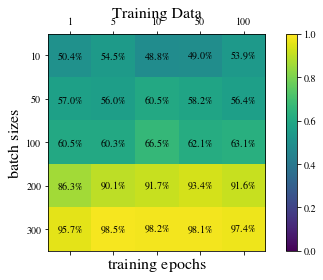

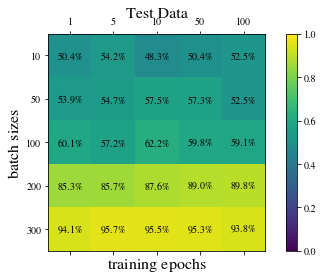

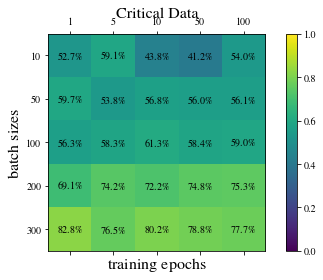

In [139]:
%matplotlib inline
epochs=[1, 5, 10, 50, 100]
batches=[10, 50, 100, 200, 300]
plot_data(epochs,batches,train_accuracy_3, "Training Data")
plot_data(epochs,batches,test_accuracy_3, "Test Data")
plot_data(epochs,batches,critical_accuracy_3, "Critical Data")

#### Problem 3 - SDSS galaxies

The data is provided in the file <b>"specz_data.txt"</b>. The columns of the file (length of 13) correspond to - <br>
spectroscopic redshift ('zspec'), RA, DEC, magnitudes in 5 bands - u, g, r, i, z (denoted as 'mu,' 'mg,' 'mr,' 'mi,' 'mz' respectively); Exponential and de Vaucouleurs model magnitude fits ('logExp' and 'logDev' http://www.sdss.org/dr12/algorithms/magnitudes/); zebra fit ('pz_zebra); Neural Network fit ('pz_NN') and its error estimate ('pz_NN_Err') <br>

We will undertake 2 exercises  - 
- Regression
    - We will use the magnitude of object in different bands ('mu, mg, mr, mi, mz') and do a regression exercise to estimate the redshift of the object. Hence our feature space is 5.
    - The correct redshift is given by 'zspec', which is the spectroscopic redshift of the object. We will use this for training and testing purpose. 
    
    Sidenote: Photometry vs. Spectroscopy
    
    <i>&nbsp; &nbsp; The amount of energy we receive from celestial objects – in the form of radiation – is called the flux, and an astro- nomical technique of measuring the flux is photometry. Flux is usually measured over broad wavelength bands, and with the estimate of the distance to an object, it can infer the object’s luminosity, temperature, size, etc. Usually light is passed through colored filters, and we measure the intensity of the filtered light. 
    
    &nbsp; &nbsp; On the other hand, spectroscopy deals with the spectrum of the emitted light. This tells us what the object is made of, how it is moving, the pressure of the material in it, etc. Note that for faint objects making photometric observation is much easier.
    
    &nbsp; &nbsp; Photometric redshift (photoz) is an estimate of the distance to the object using photometry. Spectroscopic redshift observes the object’s spectral lines and measures their shifts due to the Doppler effect to infer the distance.</i>
    

- Classification
    - We will use the same magnitudes and now also the redshift of the object  ('zspec') to classify the object as either Elleptical or Spiral. Hence our feature space is now 6.
    - The correct class is given by compring 'logExp' and 'logDev' which are the fits for Exponential and Devocular profiles. If logExp > logDev, its a spiral and vice-versa. We will use this for training and testing purpose. Since the classes are not explicitly given, generate a column for those (Classes can be $\pm 1$. If it is $0$, it does not belong to either of the class.)


##### Cleaning

Read in the files to create the data (X and Y) for both regression and classification. <br>
You will have to clean the data - 
- Drop the entries that are nan or infinite
- Drop the unrealistic numbers such as 999, -999; and magnitudes that are unrealistic. Since these are absolute magnitudes, they should be positive and high. Lets choose a magnitude limit of 15 as safe bet.
- For classification, drop the entries that do not belong to either of the class


In [140]:
#Read in and create data

fname = '/content/drive/My Drive/P188_288/P188_288_Project3/specz_data.txt'
spec_dat=np.genfromtxt(fname,names=True)
print(spec_dat.dtype.fields.keys())
#convenience variable
zspec = spec_dat['zspec']
pzNN = spec_dat['pz_NN']
#some N redshifts are not defined
pzNN[pzNN < 0] = np.nan

#For Regression
bands = ['u', 'g', 'r','i', 'z' ]
mlim = 15

xdata = np.concatenate([[spec_dat['m%s'%i] for i in bands]]).T
bad = (xdata[:, 0] < mlim) | (xdata[:, 1] < mlim) | (xdata[:, 2] < mlim) & (xdata[:, 3] < mlim) | (xdata[:, 4] < mlim)
xdata = xdata[~bad]
xdata[xdata<0] = 0
ydata = zspec[~bad]

#For classification
classes = np.sign(spec_dat['logExp'] - spec_dat['logDev'])
tmp = np.concatenate([[spec_dat['m%s'%i] for i in bands]]).T
xxdata = np.concatenate([tmp, zspec.reshape(-1, 1)], axis=1)
bad = (classes==0) | (xxdata[:, 0] < mlim) | (xxdata[:, 1] < mlim) | (xxdata[:, 2] < mlim) & (xxdata[:, 3] < mlim) | (xxdata[:, 4] < mlim)
xxdata = xxdata[~bad]
classes = classes[~bad]

dict_keys(['zspec', 'RA', 'DEC', 'mu', 'mg', 'mr', 'mi', 'mz', 'logExp', 'logDev', 'pz_zebra', 'pz_NN', 'pz_NN_Err'])


For regression, X and Y data (called "xdata" and "ydata," respectively) is cleaned magnitudes (5 feature space) and spectroscopic redshifts respectively.
For classification, X and Y data (called "xxdata" and "classes" respectively) is cleaned magnitudes+spectroscopic redshifts respectively (6 feature space) and classees respectively.

In [141]:
print('For Regression:')
print('Before: Size of datasets is ', zspec.shape[0])
print('After: Size of datasets is ', xdata.shape[0])
print('')
print('For Classification:')
print('Before: Size of datasets is ', zspec.shape[0])
print('After: Size of datasets is ', xxdata.shape[0])

For Regression:
Before: Size of datasets is  5338
After: Size of datasets is  4535

For Classification:
Before: Size of datasets is  5338
After: Size of datasets is  4147


##### Visualization

The next step should be to visualize the data. <br>
For regression
- Make a histogram for the distribution of the data (spectroscopic redshift). 
- Make 5 2D histograms of the distribution of the magnitude as function of redshift (Hint: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.hist2d.html)

For classification <br>
- Make 6 1-d histogram for the distribution of the data (6 features - zspec and 5 magnitudes) for both class 1 and -1 separately 

<span style="color:blue"> <i> 1. Make histograms for both regression and classification. </i></span> <br>

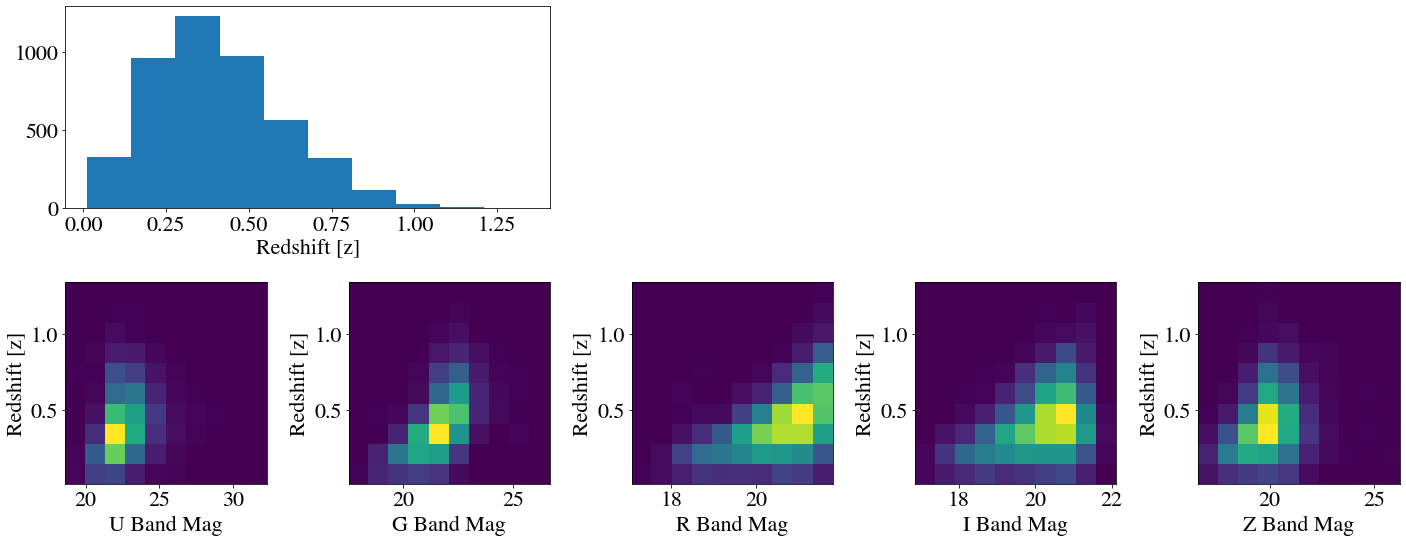

In [162]:
#REGRESSION SECTION
f, axes = plt.subplots(2,5, figsize=(20,8))

gs = axes[0,0].get_gridspec()
for ax in axes[0,:]:
    ax.remove()

axbig = f.add_subplot(gs[0, :2])

axbig.set_xlabel("Redshift [z]")
axbig.hist(ydata)

axes[1,0].hist2d(xdata[:,0], ydata)
axes[1,0].set_xlabel("U Band Mag")
axes[1,1].hist2d(xdata[:,1], ydata)
axes[1,1].set_xlabel("G Band Mag")
axes[1,2].hist2d(xdata[:,2], ydata)
axes[1,2].set_xlabel("R Band Mag")
axes[1,3].hist2d(xdata[:,3], ydata)
axes[1,3].set_xlabel("I Band Mag")
axes[1,4].hist2d(xdata[:,4], ydata)
axes[1,4].set_xlabel("Z Band Mag")

for ax in axes[1,:]:
  ax.set_ylabel("Redshift [z]")

f.tight_layout()


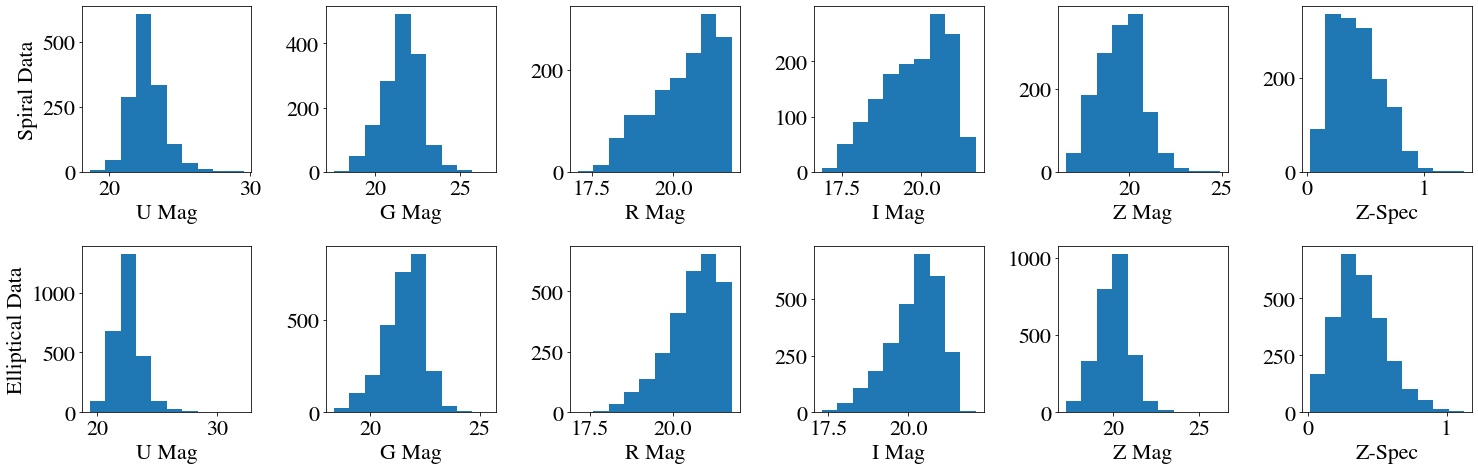

In [164]:
#CLASSSIFICATION SECTION

elliptical_indeces = np.where(classes == -1)[0]
spiral_indeces = np.where(classes == 1)[0]
names = ['U Mag', 'G Mag', "R Mag", "I Mag", "Z Mag", "Z-Spec"]

f, axes = plt.subplots(2,6, figsize=(21,7))

for i, ax in enumerate(axes[0,:]):
  ax.hist(xxdata[spiral_indeces, i])
  ax.set_xlabel(names[i])
  if i == 0:
    ax.set_ylabel("Spiral Data")

for i, ax in enumerate(axes[1,:]):
  ax.hist(xxdata[elliptical_indeces, i])
  ax.set_xlabel(names[i])
  if i == 0:
    ax.set_ylabel("Elliptical Data")


f.tight_layout()


<span style="color:blue"> <i> 2. Do the following preprocessing: </i></span> <br>

#####  Preprocessing:

- Next, split the sample into training data and the testing data. We will be using the training data to train different algorithms and then compare the performance over the testing data. In this project, keep 80% data as training data and uses the remaining 20% data for testing.  <br>
- Often, the data can be ordered in a specific manner, hence shuffle the data prior to splitting it into training and testing samples. <br>
- Many algorithms are also not scale invariant, and hence scale the data (different features to a uniform scale). All this comes under preprocessing the data.
http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing <br>
Use StandardScaler from sklearn (or write your own routine) to center the data to 0 mean and 1 variance. Note that you only center the training data and then use its mean and variance to scale the testing data before using it. <br><br>

Hint: How to get a scaled training data: <br>

1. Let the training data be: train = ("training X data", "training Y data")<br>
2. You can first define a StandardScaler: <br>
scale_xdata, scale_ydata = preprocessing.StandardScaler(), preprocessing.StandardScaler()<br>
3. Then, do the fit: <br>
for regression: scale_xdata.fit(train_regression[0]), scale_ydata.fit(train_regression[1].reshape(-1, 1))<br>
for classication: scale_xdata.fit(train_classification[0])<br>
  Here, no need to fit for y data for classification (it's either +1 or -1. Already scaled)<br>
4. Next, transform: <br>
 for regression: scaled_train_data = (scale_xdata.fit_transform(train_regression[0]), scale_ydata.fit_transform(train_regression[1].reshape(-1, 1)))<br>
 for classication: scaled_train_data = (scale_xdata.fit_transform(train_classification[0]), train_classification[1])<br>
 Again, y data is already scaled for classification.  <br>


Do this for test data as well.


In [148]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#REGRESSION
#shuffle the data
shuffled_indeces = np.random.permutation(range(len(xdata[:,0])))
Xdata = xdata[shuffled_indeces,:]
Ydata = ydata[shuffled_indeces]

X_train, X_test, Y_train, Y_test = train_test_split(Xdata,Ydata, train_size=0.8)

print("Regression Data")
print(np.shape(X_train), np.shape(Y_train))
print(np.shape(X_test), np.shape(Y_test))

#CLASSIFICATION
shuffled_indeces = np.random.permutation(range(len(xxdata[:,0])))
XXdata = xxdata[shuffled_indeces,:]
YYdata = classes[shuffled_indeces]

XX_train, XX_test, YY_train, YY_test = train_test_split(XXdata,YYdata, train_size=0.8)

print("Classification Data")
print(np.shape(XX_train), np.shape(YY_train))
print(np.shape(XX_test), np.shape(YY_test))


Regression Data
(3628, 5) (3628,)
(907, 5) (907,)
Classification Data
(3317, 6) (3317,)
(830, 6) (830,)


In [149]:
#Regression
train_regression = (X_train, Y_train)
scale_xdata, scale_ydata = preprocessing.StandardScaler(), preprocessing.StandardScaler()
scale_xdata.fit(train_regression[0])
scale_ydata.fit(train_regression[1].reshape(-1,1))
scaled_train_data_regression = (scale_xdata.fit_transform(train_regression[0]), scale_ydata.fit_transform(train_regression[1].reshape(-1,1)))

test_regression = (X_test, Y_test)
scale_xdata, scale_ydata = preprocessing.StandardScaler(), preprocessing.StandardScaler()
scale_xdata.fit(test_regression[0])
scale_ydata.fit(test_regression[1].reshape(-1,1))
scaled_test_data_regression = (scale_xdata.fit_transform(test_regression[0]), scale_ydata.fit_transform(test_regression[1].reshape(-1,1)))


#Classification
train_classification = (XX_train, YY_train)
scale_xdata, scale_ydata = preprocessing.StandardScaler(), preprocessing.StandardScaler()
scale_xdata.fit(train_classification[0])
scaled_train_data_classification = (scale_xdata.fit_transform(train_classification[0]), train_classification[1])

test_classification = (XX_test, YY_test)
scale_xdata, scale_ydata = preprocessing.StandardScaler(), preprocessing.StandardScaler()
scale_xdata.fit(test_classification[0])
scaled_test_data_classification = (scale_xdata.fit_transform(test_classification[0]), test_classification[1])

##### Metrics

The last remaining preperatory step is to write metric for gauging the performance of the algorithm. Write a function to calculate the 'RMS' error given (y_predict, y_truth) to gauge regression and another function to evaluate accuracy of classification. <br>
In addition, for classification, we will also use confusion matrix.

Below is an example you can use. Feel free to write you own.

In [150]:
from sklearn.metrics import confusion_matrix

def rms(x, y, scale1=None, scale2=None):
    '''Calculate the rms error given the truth and the prediction
    '''
    mask = np.isfinite(x[:]) & np.isfinite(y[:])
    if scale1 is not None:
        x= scale1.inverse_transform(x)
    if scale2 is not None:
        y = scale2.inverse_transform(y)
    return  np.sqrt(np.mean((x[mask] - y[mask]) ** 2))

def acc(x, y):
    '''Calculate the accuracy given the truth and the prediction
    '''
    mask = np.isfinite(x[:]) & np.isfinite(y[:])
    return  (x == y).sum()/x.size


#### Hyperparameter method

Now, we will be varying hyperparameters to get the best model and build some intuition. There are various ways to do this and we will use Grid Search methodology (as you did in Problem 1 and 2) which simply tries all the combinations along with some cross-validation scheme. For most part, we will use 4-fold cross validation. <br>
Sklearn provides GridSearchCV functionality for this purpose. <br>

Its recommended to spend some time to go through output format of GridSearchCV and write some utility functions to make the recurring plots for every parameter. <br>
Grid Search returns a dictionary with self explanatory keys for the most part. Mostly, the keys correspond to (masked) numpy arrays of size = #(all possible combination of parameters). The value of individual parameter in every combination is given in arrays with keys starting from 'param_\*' and this should help you to match the combination with the corresponding scores. <br>
For masked arrays, you can access the data values by using \*.data
<br>
<br>
*Do not overwrite these grid search-ed variables (and not only their result) since we will compare all the models together in the end*

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

<span style="color:red"><i> You can choose to do only one of the two classifiers: kNN or Random Forests.</i></span> <br>
<span style="color:red"><i> If you choose to do Method 2 (Random Forests), take a look at hints from Method 1 (kNN). </i></span> <br>

### <span style="color:red"> Option (1) </span>
### Method 1. k Nearest Neighbors

For regression, let us play with grid search using knn to tune hyperparmeters. (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) Consider the following 3 hyperparameters - 
- Number of neighbors ([2, 3, 5, 10, 15, 20, 25, 50, 100])
- Weights of leaves (Uniform or Inverse Distance weighing)
- Distance metric (Eucledian or Manhattan distance - parameter 'p')

<span style="color:blue"> <i> 1. Do a grid search on these parameters. List the combination of hyperparameters you tried and evaluate the accuracy (mean test score) and its standard deviation. Which gives the highest accuracy value? </i></span> <br>

In [151]:
from sklearn.neighbors import KNeighborsRegressor

Hint: (Read the documentations carefully for more detail.)

First, define the hyperparameters: parameters = {'n_neighbors':[2, 3, 5, 10, 15, 20, 25, 50, 100], 'weights':['uniform', 'distance'], 'p':[1, 2]}

Specify the algorithm you want to use: e.g. knnr = KNeighborsRegressor() 

Then, Do a grid search on these parameters using 4 fold cross validation: gcknn = GridSearchCV(knnr, parameters, cv=4)

Do the fit: gcknn.fit(*scaled_training_data) 

(Let "scaled_training_data" be the training data where "scaled_training_data = ("train X data", "train Y data")"

Get results: $results = gcknn.cv_results_$

$cv_results_$ has the following dictionaries: "rank_test_score," "mean_test_score," "std_test_score," and "params" (See http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 

Then, you can evaluate the models based on "rank_test_score" and print out their "params," along with their "mean_test_score" and "std_test_score".

In [152]:
parameters = {'n_neighbors':[2,3,5,10,15,20,25,50,100],
              'weights':['uniform', 'distance'],
              'p':[1,2]}

knnr = KNeighborsRegressor()
gcknn = GridSearchCV(knnr, parameters, cv=4)
gcknn.fit(*scaled_train_data_regression)
results = gcknn.cv_results_

In [153]:
import pandas as pd

results_df = pd.DataFrame(results)

results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002443,0.000888,0.007769,0.001339,2,1,uniform,"{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}",0.396530,0.325313,0.368335,0.457900,0.387019,0.048144,35
1,0.001883,0.000031,0.007021,0.000330,2,1,distance,"{'n_neighbors': 2, 'p': 1, 'weights': 'distance'}",0.411218,0.332035,0.376971,0.460833,0.395264,0.047134,33
2,0.002092,0.000317,0.004299,0.000108,2,2,uniform,"{'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}",0.381842,0.364117,0.346473,0.440435,0.383217,0.035323,36
3,0.002269,0.000341,0.004683,0.000128,2,2,distance,"{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}",0.396461,0.370560,0.351497,0.444389,0.390727,0.034850,34
4,0.001962,0.000032,0.007593,0.000091,3,1,uniform,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.449376,0.403955,0.424437,0.494818,0.443146,0.033892,31


In [154]:
max_index = np.argmax(results_df['mean_test_score'])

print("""We find that the highest accuracy was found with a mean_test_score = {0} and a std_test_score = {1}.
the corresponding hyperparameters were {2}""".format(results_df['mean_test_score'][max_index],results_df['std_test_score'][max_index],
                                                     results_df['params'][max_index]))

We find that the highest accuracy was found with a mean_test_score = 0.5460464033991662 and a std_test_score = 0.029587690681675223.
the corresponding hyperparameters were {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}


<span style="color:blue"> <i> 2. Also print out fitting and scoring times for all hyperparameter combinations. </i></span> <br>

*Plot timings for fitting and scoring*

Hint: Assume that you got results from: $results = gcknn.cv_results_$

Then, get the scoring time: results['mean_score_time']

and the fitting time: results['mean_fit_time']

In [155]:
time_df = pd.DataFrame({'mean_score_time':results_df['mean_score_time'], 'mean_fit_time':results_df['mean_fit_time'], 'params':results_df['params']})

time_df

,mean_score_time,mean_fit_time,params
0,0.007769,0.002443,"{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}"
1,0.007021,0.001883,"{'n_neighbors': 2, 'p': 1, 'weights': 'distance'}"
2,0.004299,0.002092,"{'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}"
3,0.004683,0.002269,"{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}"
4,0.007593,0.001962,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}"
5,0.007720,0.001922,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}"
6,0.004701,0.001894,"{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}"
7,0.005279,0.001871,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}"
8,0.009743,0.001920,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}"
9,0.008783,0.001896,"{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}"


<span style="color:blue"> <i> 3. Based on the results you obtained in Part 1 and 2, answer the following questions </i></span> <br>

- Is it always better to use more neighbors?
- Is it better to weigh the leaves, if yes, which distnace metric performs better?
- GridCV returns fitting and scoring time for every combination. You will find that scoring time is higher than training time. Why do you think is that the case?

##### Answer:

* It is not always better to use more neighbors. We can see that when using more neighbors it takes more time to fit and score.

* We see that weighing the leaves tends to only have an impact on the mean_score_time and not the mean_fit_time. It appears that weighing leaves does improve the time. Weighting by distance is better than uniform.

* Likely because a lot of time is spent comparing when scoring. Namely it has to compute all more expensive combinations in order to do the comparison so it takes longer than the training time.

<span style="color:blue"> <i> 4. Which parameters seem to affect the performance most? To better answer this question, make plots of the mean test score for each hyperparameter. </i></span> <br>

Hint:
Suppose you have two types of hyperparameters: A and B.
Let A = [1, 2] and B = [1, 2, 4, 7, 10].

Then, you have 20 different combination of hyperparameters.

Let A = 1. Then, you can try (A,B) = (1,1), (1,2), (1,4), (1,7), (1,10)
Suppose that the mean score you got for the above combination is [0.7, 0.72, 0.75, 0.77, 0.8].
Similarly, for A = 2, you tried (A,B) = (2,1), (2,2), (2,4), (2,7), (2,10) and obtaind the mean score of [0.8, 0.82, 0.85, 0.87, 0.9].

To better see how changing the value of paramter A affects the performance, you can make the following plot:

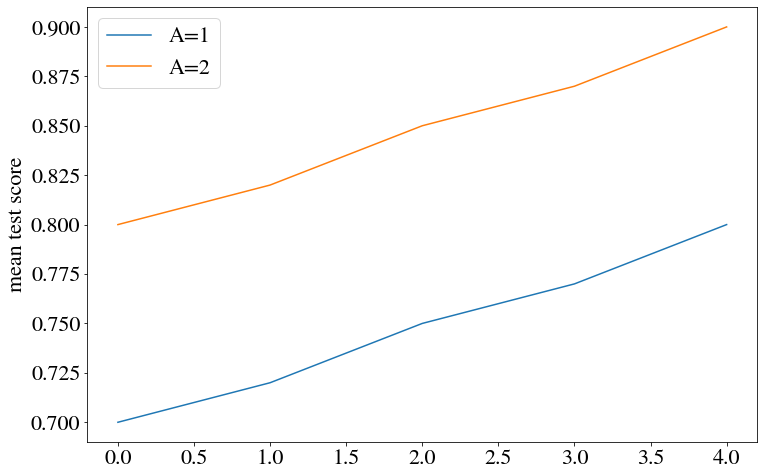

In [166]:
A_1 = [0.7, 0.72, 0.75, 0.77, 0.8]
A_2 = [0.8, 0.82, 0.85, 0.87, 0.9]

plt.figure(figsize=(12,8))
plt.plot(A_1, label = "A=1")
plt.plot(A_2, label = "A=2")
plt.ylabel("mean test score")
plt.legend()
plt.show()

This is the plot of the mean test score for A marginalizing over B.

Similarly, make a plot of the mean test score for each kNN hyperparameter.

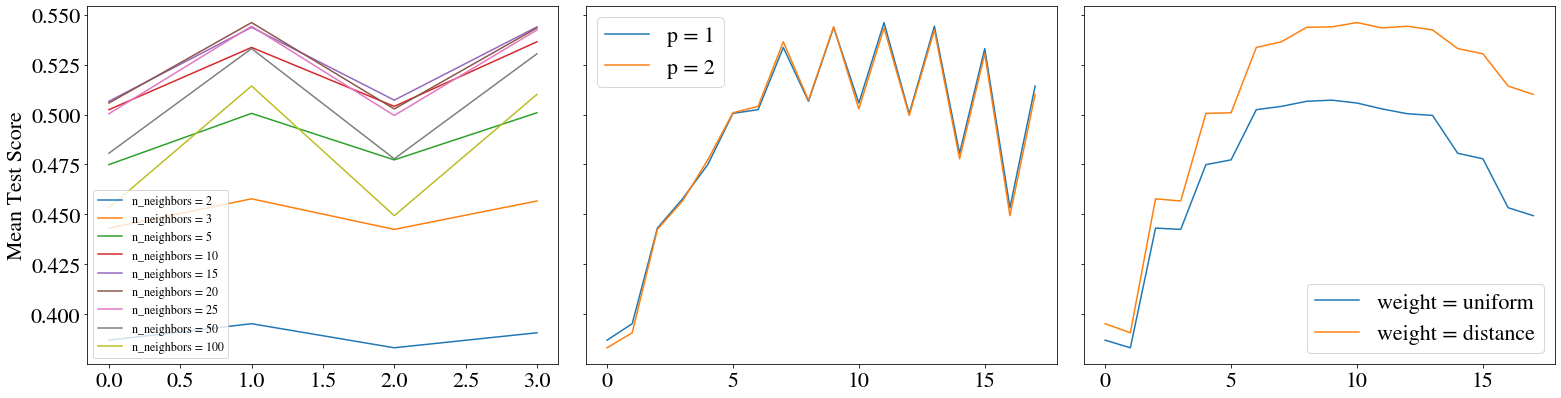

In [173]:
# results_df['mean_test_score']
A = results_df['param_n_neighbors']
B = results_df['param_p']
C = results_df['param_weights']
means = results_df['mean_test_score']
data = np.array([means,A,B,C])
ns = np.unique(A)

f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(22,6))

for n in ns:
  lab = 'n_neighbors = ' + str(n)
  ax1.plot(np.array(range(len(means[np.where(data[1,:] == n)[0]]))), means[np.where(data[1,:] == n)[0]], label=lab)

ax1.legend(loc='lower left', fontsize=12)
ax1.set_ylabel("Mean Test Score")

ax2.plot(np.array(range(len(means[np.where(data[2,:] == 1)[0]]))), means[np.where(data[2,:] == 1)[0]], label='p = 1')
ax2.plot(np.array(range(len(means[np.where(data[2,:] == 2)[0]]))),means[np.where(data[2,:] == 2)[0]], label='p = 2')
ax2.legend()

ax3.plot(np.array(range(len(means[np.where(data[3,:] == 'uniform')[0]]))),means[np.where(data[3,:] == 'uniform')[0]],label='weight = uniform')
ax3.plot(np.array(range(len(means[np.where(data[3,:] == 'uniform')[0]]))),means[np.where(data[3,:] == 'distance')[0]],label='weight = distance')
ax3.legend()

f.tight_layout()
plt.show()


<span style="color:blue"> <i> 5. You have determined the best combination of hyperparameters and CV schemes. Predict the test y data using the GridSearchCV method. Use the "rms" metric function we defined earlier and calculate the rms error on the test data.  </i></span> <br>

Hint: To determine the rms error, you need:

Truth: given from data (test_data[1]) <br>
Prediction: gridsearch.predict(test_data[0])
(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


In [174]:
prediction = gcknn.predict(scaled_test_data_regression[0])
truth = scaled_test_data_regression[1]

rms_regression = rms(prediction,truth)

print("We find that the rms error is {0:0.4f}".format(rms_regression))

We find that the rms error is 0.6639


#### Classification

In [175]:
from sklearn.neighbors import KNeighborsClassifier
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Here we will look at 4 different type of cross-validation schemes - 
- Kfold
- Stratified Kfold
- Shuffle Split
- Stratified Shuffle Split

<span style="color:blue"> <i> 6. Assuming the list of hyperparameters from Part 1, do 4 different grid searches. From Part 1, take top 5 combination of hyperparameters which gives you the highest accuracy value. Rank the performance of CV schemes for each combination.  </i></span> <br>

In [176]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit

In [177]:
top_5_indices = np.array(np.argsort(results_df['mean_test_score'])[-5:])
top_5_values = np.array(np.sort(results_df['mean_test_score'])[-5:])
print(np.argmax(results_df['mean_test_score']))
top_5_df = results_df['params'][top_5_indices]
top_5_df

top_5_indices

21


array([23, 17, 19, 25, 21])

In [178]:
parameters = {'n_neighbors':[2, 3, 5, 10, 15, 20, 25, 50, 100], 'weights':['uniform', 'distance'], 'p':[1, 2]}
knnc = KNeighborsClassifier()

#Grid Search
gc = GridSearchCV(knnc, parameters, cv=KFold(4))
#Do the fit
gc.fit(*scaled_train_data_classification)

gc2 = GridSearchCV(knnc, parameters, cv=StratifiedKFold(4))
#Do the fit
gc2.fit(*scaled_train_data_classification)

gc3 = GridSearchCV(knnc, parameters, cv=ShuffleSplit(4))
#Do the fit
gc3.fit(*scaled_train_data_classification)

gc4 = GridSearchCV(knnc, parameters, cv=StratifiedShuffleSplit(4))
#Do the fit
gc4.fit(*scaled_train_data_classification)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=4, random_state=None, test_size=None,
            train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 5, 10, 15, 20, 25, 50, 100],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [179]:
gc_df = pd.DataFrame(gc.cv_results_)
gc2_df = pd.DataFrame(gc2.cv_results_)
gc3_df = pd.DataFrame(gc3.cv_results_)
gc4_df = pd.DataFrame(gc4.cv_results_)

top_5 = list(top_5_df)


compare_mean_df = pd.DataFrame({'Original':top_5_values, 'KFold':list(gc_df['mean_test_score'][top_5_indices]), 
 'StratifiedKFold':list(gc2_df['mean_test_score'][top_5_indices]),
 'ShuffleSplit':list(gc3_df['mean_test_score'][top_5_indices]),
 'StratifiedShuffleSplit':list(gc4_df['mean_test_score'][top_5_indices]), 'params':top_5})


compare_std_df = pd.DataFrame({'Original':list(results_df['std_test_score'][top_5_indices]), 'KFold':list(gc_df['std_test_score'][top_5_indices]), 
 'StratifiedKFold':list(gc2_df['std_test_score'][top_5_indices]),
 'ShuffleSplit':list(gc3_df['std_test_score'][top_5_indices]),
 'StratifiedShuffleSplit':list(gc4_df['std_test_score'][top_5_indices]), 'params':top_5})


In [180]:
print("Mean Test Score")
compare_mean_df

Mean Test Score


,Original,KFold,StratifiedKFold,ShuffleSplit,StratifiedShuffleSplit,params
0,0.543376,0.755794,0.754594,0.756024,0.754518,"{'n_neighbors': 20, 'p': 2, 'weights': 'distan..."
1,0.543656,0.750969,0.751276,0.760542,0.759036,"{'n_neighbors': 15, 'p': 1, 'weights': 'distan..."
2,0.543894,0.751876,0.751579,0.749247,0.759789,"{'n_neighbors': 15, 'p': 2, 'weights': 'distan..."
3,0.544234,0.758204,0.756702,0.765060,0.762048,"{'n_neighbors': 25, 'p': 1, 'weights': 'distan..."
4,0.546046,0.753380,0.750671,0.759036,0.753765,"{'n_neighbors': 20, 'p': 1, 'weights': 'distan..."


In [181]:
print("Std Test Score")
compare_std_df

Std Test Score


,Original,KFold,StratifiedKFold,ShuffleSplit,StratifiedShuffleSplit,params
0,0.031272,0.023330,0.009974,0.010214,0.026729,"{'n_neighbors': 20, 'p': 2, 'weights': 'distan..."
1,0.029436,0.022882,0.012210,0.006565,0.027524,"{'n_neighbors': 15, 'p': 1, 'weights': 'distan..."
2,0.033824,0.018773,0.006885,0.012304,0.021017,"{'n_neighbors': 15, 'p': 2, 'weights': 'distan..."
3,0.028007,0.025800,0.013586,0.009525,0.027606,"{'n_neighbors': 25, 'p': 1, 'weights': 'distan..."
4,0.029588,0.027044,0.015106,0.007679,0.022976,"{'n_neighbors': 20, 'p': 1, 'weights': 'distan..."


<span style="color:blue"> <i> 7. Answer the following questions: </i></span> <br>

- Are the conclusions different for any parameter from the regression case?
- Does the mean accuracy change for different CV scheme?
- Does the standard deviation in mean accuracy change?

##### Answer:

We find that the best CV scheme is stratified shuffle split but not by a large margin. All the CV schemes yeild very similar results for the mean and std test scores, we see a slightly larger difference in the std than the mean. In general it is clear that n_neighbors = 20 or 15 is optimal, p doesn't really matter much, its pretty evenly split between 1 and 2, and it is obvious that weighting by distance is optimal. Therefore the conclusions don't really change much at all from the regression case based on the parameters. We see slight variation in mean and std accuracy but not by much. 

<span style="color:blue"> <i> 8. Using the best combination of hyperparameters and CV schemes you have found, compute the confusion matrix (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and evaluate the accuracy.  </i></span> <br>

Hint: To get a confusion matrix, you need both truth (available from data) and prediction (can be computed using .predict function from GridSearchCV (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

The accuracy of our classification model is 0.743


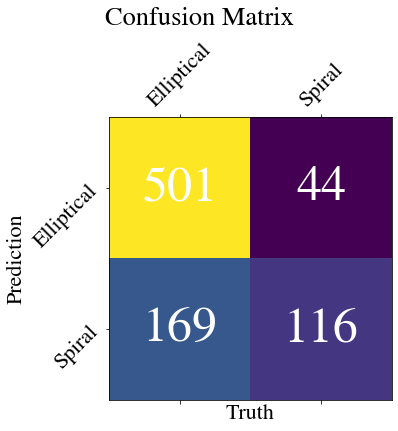

In [201]:
prediction_class = gc3.predict(scaled_test_data_classification[0])

truth_class = scaled_test_data_classification[1]

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true= truth_class, y_pred= prediction_class)
accuracy = acc(truth_class, prediction_class)

f, ax = plt.subplots(1,1, figsize=(6,6.5))
f.suptitle("Confusion Matrix")
ax.matshow(conf_mat, cmap='viridis')
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, conf_mat[i, j],
                       ha="center", va="center", color="w", fontsize=50)

ax.set_xticklabels(['', 'Elliptical', 'Spiral'],rotation=45); ax.set_yticklabels(['','Elliptical','Spiral'],rotation=45); 
ax.set_xlabel("Truth"); ax.set_ylabel("Prediction")

f.tight_layout()

print("The accuracy of our classification model is {0:0.3f}".format(accuracy))

### <span style="color:red"> Option (2) </span>
### Method 2. Random Forests

The most important feature of the random forest is the number of trees in the ensemble. We will also play with the maximum depth of the trees.

Try:<br>
n_estimators = [10, 50, 150, 200, 300]<br>
max_depth = [10, 50, 100]<br>
#@title
from sklearn.ensemble import RandomForestRegressor
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
<span style="color:blue"> <i> 1. Do the grid search over n_estimators and max_depth. List the combination of hyperparameters you tried and evaluate the accuracy (mean test score) and its standard deviation. Which gives the highest accuracy value?  </i></span> <br>

#@title
rf = RandomForestRegressor()
parameters = ...

gcrf = GridSearchCV(rf, parameters, cv=5)

...
<span style="color:blue"> <i> 2. Which parameters seem to affect the performance most? To better answer this question, make plots of the mean test score for each hyperparameter. (plot the mean test score of n_estimators marginalizing over max_depth, etc) </i></span> <br>
#@title
...
<span style="color:blue"> <i> 3. Based on the results you obtained in Part 1, answer the following questions: </i></span> <br>

- Are the scores of these models statistically different? Based on this, which architecture will you choose for your model?
- For every parameter, make the plot for fitting time. Based on this and the previous question, how many trees do you recommend keeping in the ensemble?
#@title
...
##### Answer:

<span style="color:blue"> <i> 4. You have determined the best combination of hyperparameters. Predict the test y data using the GridSearchCV method. Use the "rms" metric function we defined earlier and calculate the rms error on the test data.  </i></span> <br>
#@title
...
#### Classification


#@title
from sklearn.ensemble import RandomForestClassifier
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#@title
#Grid search (This will take few minutes)

rfc = RandomForestClassifier()
parameters = ...

gcrfc = GridSearchCV(rfc, parameters, cv=StratifiedShuffleSplit(4, 0.1, random_state = 100))

...
<span style="color:blue"> <i> 5. Assuming the list of hyperparameters from Part 1, do the grid search using StratifiedShuffleSplit CV scheme. List the combination of hyperparameters you tried and evaluate the accuracy (mean test score) and its standard deviation. Which gives the highest accuracy value?  </i></span> <br>
#@title
...
<span style="color:blue"> <i> 6. Using the best combination of hyperparameters, compute the confusion matrix (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and evaluate the accuracy.  </i></span> <br>
#@title
...

***

In [ ]:
!if [ -d SIG_GIS ]; then rm -Rf SIG_GIS; fi
!git clone https://github.com/biweidai/SIG_GIS.git

Cloning into 'SIG_GIS'...
remote: Enumerating objects: 271, done.
remote: Counting objects: 100% (271/271), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 271 (delta 179), reused 200 (delta 121), pack-reused 0
Receiving objects: 100% (271/271), 3.45 MiB | 8.21 MiB/s, done.
Resolving deltas: 100% (179/179), done.


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./SIG_GIS/')
from GIS import GIS

#### Problem 4 - Generative model

In the 3 problems above we worked on classification and regression. For those tasks we are given the labels and features of some data, and we try to predict the labels or features of the new data. This is supervised learning. Unsupervised learning is another important field in Machine Learning. In contrast to supervised learning that usually makes use of human-labeled data, unsupervised learning works with datasets with no pre-existing labels and with minimum human supervision (https://en.wikipedia.org/wiki/Unsupervised_learning). In HW 2 we have used UMAP to reduce the dimensionality of MNIST dataset, and then used HDBSCAN to do cluster analysis on the low dimension representation of MNIST. In HW 3 we used Principle Component Analysis (PCA) to model the Quasar spectrum and MNIST. In HW 4 we used Independent Component Analysis (ICA) to identify independent sources in mixed signals. These are all examples of unsupervised learning.

#### Normalizing Flow

In this problem we will train some generative models. Generative model is an important topic in unsupervised learning. It tries to learn the underlying probability density of the given data (either explicitly or implicitly) so as to generate new data. Some popular models include autoregressive models, Normalizing Flows (NF), Variational Auto-Encoders (VAE), and Generative Adverserial Networks (GAN). In HW 7 we have used a pretrained VAE to reconstruct MNIST images from incomplete and noisy data. In this problem we will focus on NFs. This exercise is based on https://arxiv.org/abs/2007.00674 .

A NF maps the data $x$ to latent variables $z$ through a sequence of invertible transformations $f = f_1 \circ f_2 \circ ... \circ f_n$, such that $z = f(x)$ and $z$ is mapped to a base distribution $\pi(z)$, which is normally chosen to be a standard Gaussian distribution. The probability density of data $x$ can be evaluated using the change of variables formula:

$$p(x) = \pi(f(x)) |\det \left(\frac{\partial f(x)}{\partial x}\right)| = \pi(f(x)) \prod_{l=1}^n |\det \left(\frac{\partial f_l(x)}{\partial x}\right)| .$$

In order to efficiently evaluate the density, the determinant of the Jacobian of each transformation $\det (\frac{\partial f_l(x)}{\partial x})$ must be easy to compute. 

#### Pytorch

In HW 7 and this project we have used the Tensorflow and Keras framework. PyTorch is another machine learning framework that becomes very popular in recent years. Compared to Tensorflow, PyTorch is very similar to numpy and very pythonic, and therefore is easy to learn if you are already familiar with Python. While Tensorflow is currently the platform of choice in industry, PyTorch is more popular in the research community. In this problem we will use PyTorch to help you become familiar with this platform. Here is a great tutorial on PyTorch basics: https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html . We encourage you to read at least the first topic of the tutorial (What is PyTorch?). We will also give you some examples on PyTorch in the following questions.

We first look at a simple 1D example. Note that in 1D one has many different ways to estimate the data density, e.g., Kernel Density Estimation (KDE), Gaussian Mixture Model (GMM), histogram, etc.(https://scikit-learn.org/stable/modules/density.html). One does not have to use NF. We give you this 1D example just to show you how NF works. High dimensional problem is where NFs really outperform those methods, and we will look at high dimensional problems later. 

<span style="color:blue"> <i> 1. Firstly, load in the data and make a histogram plot of the pdf of data. Set the number of bins to 50. Make sure your histogram plot is normalized.</i></span>

In [ ]:
data = np.load('/content/drive/My Drive/P188_288/P188_288_Project3/data_ThreeGaussian.npy')

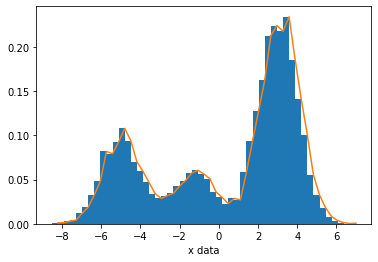

In [ ]:
plt.xlabel("x data")
plt.hist(data, bins=50, density=True)
plt.plot(np.histogram(data, bins=50, density=True)[1][1:],np.histogram(data, bins=50, density=True)[0])
plt.show()

Now let's use NF to model the data pdf. Assuming that the true data distribution is $p(x)$, our goal is to find an invertible transformation $f$ to map the data $x$ to some latent variables $z=f(x)$ such that $z$ follows a standard Gaussian distribution. For 1D, the solution $f(x)$ is easy to find:
$$f(x)=G^{-1}(F(x)) ,$$
where $F$ is the Cumulative Distribution Function (CDF) of data distribution, and $G$ is the CDF of standard Gaussian. Then the pdf of data $p(x)$ is given by the change of variable formula
$$p(x)=N(f(x))|\frac{df(x)}{dx}| ,$$
where $N$ is the pdf of standard Gaussian. 

In this problem we will approximate $f(x)$ using piecewise rational quadratic spline functions, which are monotonic, differentiable and analytically invertible. Here we provide you an example of using piecewise rational quadratic spline functions to approximate a simple function $y=x^3$, and then calculate the function derivative and invert the function.

In [ ]:
from RQspline import RQspline

def RQspline_interp(x, y):

    #x and y are torch 1d tensors and they must be strictly monotonic

    assert x.ndim == 1 and y.ndim == 1
    assert len(x) == len(y)

    ndim = 1
    nknot = len(x)
    spline = RQspline(ndim, nknot).requires_grad_(False)

    dy = y[1:] - y[:-1]
    dx = x[1:] - x[:-1]
    assert (dx>0).all() and (dy>0).all()

    h = dx
    s = dy / dx
    deriv = torch.zeros_like(x)
    deriv[1:-1] = (s[:-1]*h[1:] + s[1:]*h[:-1]) / (h[1:] + h[:-1])
    deriv[0] = dy[0] / dx[0]
    deriv[-1] = dy[-1] / dx[-1]

    spline.set_param(x.reshape(1,-1), y.reshape(1,-1), deriv.reshape(1,-1))
    return spline

In [ ]:
# create an array of x and y
x = np.linspace(-3, 3, 10, endpoint=True)
y = x**3

# transform x and y to PyTorch tensors
x = torch.tensor(x)
y = torch.tensor(y)

# define piecewise ratianal quadratic spline functions
spline = RQspline_interp(x, y)

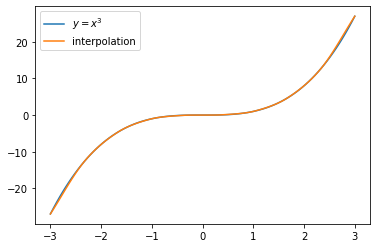

In [ ]:
#plot original function
x_plot = np.linspace(-3, 3, 100, endpoint=True)
y_plot = x_plot**3
plt.plot(x_plot, y_plot, label='$y=x^3$')

#Create PyTorch tensor x. The data type must be float (not double), and the shape must be (n, 1)
x_plot_tensor = torch.tensor(x_plot).float().reshape(-1,1)

#Call the spline function. It returns y and log(dy/dx)
y_plot_tensor, log_deriv = spline(x_plot_tensor)
plt.plot(x_plot_tensor.numpy(), y_plot_tensor.numpy(), label='interpolation')
plt.legend()
plt.show()

The derivative from interpolation

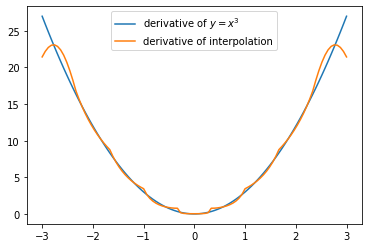

In [ ]:
#plot dy/dx
deriv = 3*x_plot**2
plt.plot(x_plot, deriv, label='derivative of $y=x^3$')

#plot dy/dx of interpolation
plt.plot(x_plot_tensor.numpy(), torch.exp(log_deriv).numpy(), label='derivative of interpolation')
plt.legend()
plt.show()

The derivatives are not accurate around the boundaries due to boundary effect.

Invert the function

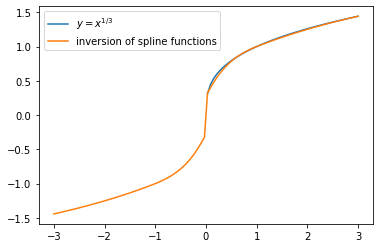

In [ ]:
# invert the original function
y_plot = x_plot**(1/3)
plt.plot(x_plot, y_plot, label='$y=x^{1/3}$')

#Invert the spline function. 
y_plot_tensor = spline.inverse(x_plot_tensor)[0]
plt.plot(x_plot_tensor.numpy(), y_plot_tensor.numpy(), label='inversion of spline functions')
plt.legend()
plt.show()

<span style="color:blue"> <i> 2. Estimate the transformation $f(x)$ that transforms the data to a standard Gaussian distribution. Follow the above example, use RQspline_interp function to approximate $f(x)$. Plot $f(x)$, $\frac{df(x)}{dx}$, and $f^{-1}(x)$. Set your x to be within (-5, 5) when making the plot. </i></span>

(Hint: 
$$f(x)=G^{-1}(F(x))$$ 
One could estimate $F$ and $G$ separately, but since both $F$ and $G$ are CDFs, an easier way is to directly estimate $f$ using quantiles of data and standard Gaussian. Let $x$ be the k-quantiles of data, then $y=f(x)$ is the corresponding k-quantiles of standard Gaussian (Think why?). You could find the quantiles of data using np.quantile, and quantiles of standard Gaussian using scipy.stats.norm.ppf(). Do not include 0 and 1 in your quantile array.)

In [ ]:
from scipy.stats import norm
k=1000
n = np.linspace(0.01,0.99,k)

x = np.quantile(data, q=n)
y = norm.ppf(n)

# transform x and y to PyTorch tensors
x = torch.tensor(x)
y = torch.tensor(y)

# define piecewise ratianal quadratic spline functions
spline = RQspline_interp(x, y)

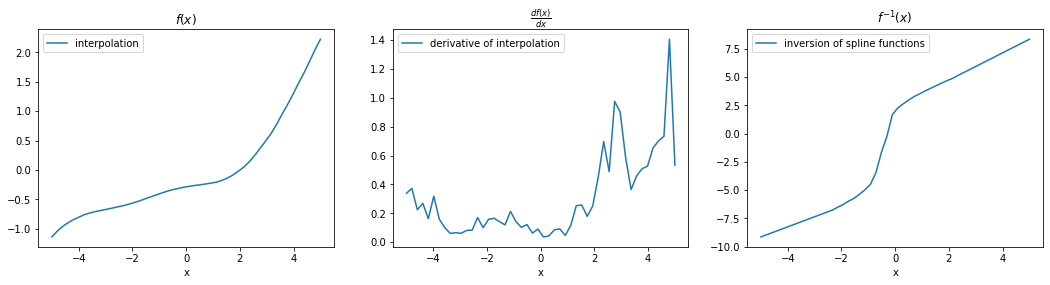

In [ ]:
# #plot original function
x_plot = np.linspace(-5, 5, 50, endpoint=True)
# y_plot = x_plot**3
# plt.plot(x_plot, y_plot, label='$y=x^3$')

#Create PyTorch tensor x. The data type must be float (not double), and the shape must be (n, 1)
x_plot_tensor = torch.tensor(x_plot).float().reshape(-1,1)
f, axes = plt.subplots(1,3, figsize=(18,4))

#Call the spline function. It returns y and log(dy/dx)
y_plot_tensor, log_deriv = spline(x_plot_tensor)
axes[0].plot(x_plot_tensor.numpy(), y_plot_tensor.numpy(), label='interpolation')
axes[0].set_title("$f(x)$")
#plot dy/dx of interpolation
axes[1].plot(x_plot_tensor.numpy(), torch.exp(log_deriv).numpy(), label='derivative of interpolation')
axes[1].set_title("$\\frac{df(x)}{dx}$")
#Invert the spline function. 
y_plot_tensor_inv = spline.inverse(x_plot_tensor)[0]
axes[2].plot(x_plot_tensor.numpy(), y_plot_tensor_inv.numpy(), label='inversion of spline functions')
axes[2].set_title("$f^{-1}(x)$")


for ax in axes:
  ax.set_xlabel("x")
  ax.legend()

plt.show()


<span style="color:blue"> <i> 3. Calculate latent variable $z=f(x)$. Make a histogram of pdf of $z$. Does it follow a Gaussian distribution? </i></span>

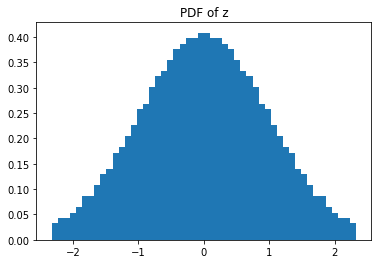

yes we see the distribution of z is gausssian.


In [ ]:
z = y

plt.hist(z, bins=50, density=True)
plt.title("PDF of z")
plt.show()

print("yes we see the distribution of z is gausssian.")

<span style="color:blue"> <i> 4. Now let's estimate the pdf of the data using the 
change of variable formula $p(x)=N(f(x))|\frac{df(x)}{dx}|$. Make a plot of $p(x)$. How does it compare with the histogram in Q1?</i></span>

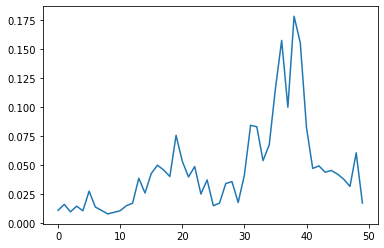

Yes we see a somewhat reminiscant trimodel gaussian distribution that we saw in Q1!


In [ ]:
N_fx = np.histogram(z, bins=50, density=True)[0]
p_x = N_fx * np.abs(torch.exp(log_deriv).numpy())[:,0]

plt.plot(p_x)
plt.show()

print("Yes we see a somewhat reminiscant trimodel gaussian distribution that we saw in Q1!")

The pdf is noisy. One could apply regularization when modeling to get a smoother pdf.

NFs allow us to sample from $p(x)$ to create new data. The idea is to firstly sample latent variable $z$ from $N(0,I)$ using torch.randn(nsample, ndim), and then transform $z$ to $x$ with inverse transform $f^{-1}$.

<span style="color:blue"> <i> 5. Sample from $p(x)$ using $x=f^{-1}(z)$. Get 10000 samples. Make a histogram of the pdf of samples. Does it agree with Q1 and Q4? </i></span>

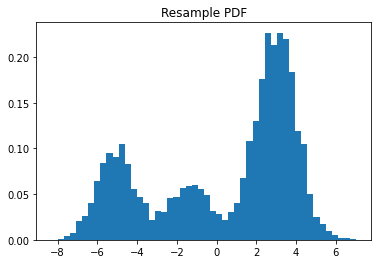

Yes! We see agreement with Q1 and Q4, now it is just smoother like the original data set.


In [ ]:
nsample = 10000
ndim = 1
z = torch.randn(nsample, ndim)

x = spline.inverse(z)[0]

plt.title("Resample PDF")
plt.hist(x[:,0], bins=50,density=True)
plt.show()

print("Yes! We see agreement with Q1 and Q4, now it is just smoother like the original data set.")

We have built a NF model in 1D. Now let's look at multidimensional problems. Similar to 1D, our goal is to construct an invertile transformation $f$ that transforms data $x$ to latent variables $z$ that follow standard Gaussian distribution. There are multiple ways to build such transformations. For example, lots of NF models parametrize $f$ with neural networks, and the parameters are trained with maximum likelihood. Here we use a different approach and solve this problem iteratively. In each iteration, we view the N-dimensional problem as N 1-dimensional problem, and use the transformation we developed in 1D to transform these N 1-dimensional variables to standard Gaussian. For example, say your dataset is 2-dimensional $x=\{x_1, x_2\}$. We apply transformations $z_1=f_1(x_1)$ and $z_2=f_2(x_2)$ such that $z_1$ and $z_2$ follow Gaussian distribution separately. However, $z_1$ and $z_2$ combined are not Gaussian, so in the next iteration, we apply a rotation to $\{z_1,z_2\}$, and then redo the 1D Gaussianization on all of the variables. We keep iterating until the pdf of variables converge to Gaussian. The rotation matrix in each iteration will be determined by ICA (see HW 4) to maximizes the independence (non-Gaussianity) of different axes. This model is called GIS (Gaussianizing Iterative Slicing). 



<span style="color:blue"> <i> 6. Follow the instructions below and use GIS to model the 2D dataset. Transform the training and test data to latent space, and make scatter plots. Do they follow Gaussian distribution? Print the mean logp of training, validation and test data. Plot the logp field using imshow. </i></span>

1.   Divide the data into training (80%), validation (10%) and test (10%) set. Transform them into Pytorch tensors. 
2.   Apply the GIS model to the data: model=GIS(data_train, data_validate)
3.   Transform the data to latent space: latent = model.forward(data)[0]. Make scatter plots of the latent training data and latent test data.
4.   Evaluate the logp of training, validation and test data using logp = model.evaluate_density(data). Print the mean logp of each set.
5.   Create 2-dimensional grid points x. Evaluate the logp on the grid points. Plot the logp field using plt.imshow.

(Hint: To create 2-dimensional grid points:

xv, yv = np.meshgrid(np.linspace(-4,4,100,endpoint=True), np.linspace(-4,4,100,endpoint=True))

x = np.zeros((10000, 2), dtype=np.float32)

x[:,0] = xv.flatten()

x[:,1] = yv[::-1].flatten())



In [ ]:
data = np.load('/content/drive/My Drive/P188_288/P188_288_Project3/data_TwoSpiral.npy')

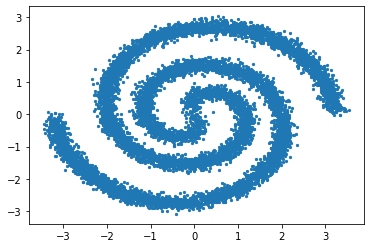

In [ ]:
plt.scatter(data[:,0], data[:,1], s=5)
plt.show()

In [ ]:
N = len(data[:,0])
data_train, data_validate, data_test = data[:int(0.8*N),:],data[int(0.8*N):int(0.9*N),:],data[int(0.9*N):,:] 

data_train = torch.tensor(data_train)
data_validate = torch.tensor(data_validate)
data_test = torch.tensor(data_test)

model_spiral=GIS(data_train, data_validate)


Streaming output truncated to the last 5000 lines.
Fit A: Time: 0.10135054588317871 Wasserstein Distance: [0.02642100676894188, 0.021143510937690735]
Fit spline Time: 0.02347874641418457
logp: -2.9579806327819824 -2.9423305988311768 time: 0.14073681831359863 iteration: 157 best: 157
Fit A: Time: 0.10639572143554688 Wasserstein Distance: [0.03068404272198677, 0.016394926235079765]
Fit spline Time: 0.02473759651184082
logp: -2.9569268226623535 -2.941554307937622 time: 0.14506769180297852 iteration: 158 best: 158
Fit A: Time: 0.07926273345947266 Wasserstein Distance: [0.02606494538486004, 0.020568223670125008]
Fit spline Time: 0.02372145652770996
logp: -2.95601749420166 -2.940626621246338 time: 0.11768054962158203 iteration: 159 best: 159
Fit A: Time: 0.12259197235107422 Wasserstein Distance: [0.03001195564866066, 0.016253042966127396]
Fit spline Time: 0.022838354110717773
logp: -2.9550297260284424 -2.9399077892303467 time: 0.1609938144683838 iteration: 160 best: 160
Fit A: Time: 0.005226

In [ ]:
#save the model for future use
torch.save(model_spiral, '/content/drive/My Drive/P188_288/P188_288_Project3/model_spiral')

# #load the model
# model_spiral = torch.load('/content/drive/My Drive/P188_288/P188_288_Project3/model_spiral')

In [ ]:

# latent = model.forward(data)[0]

latent_train = model_spiral.forward(data_train)[0]
latent_validate = model_spiral.forward(data_validate)[0]
latent_test = model_spiral.forward(data_test)[0]

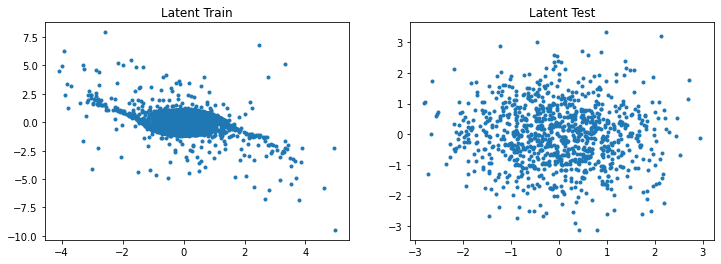

We see a approximately a 2D gaussian for the latent space! More so in the Test data than the training data


In [ ]:
f, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].scatter(latent_train[:,0],latent_train[:,1], marker='.')
axes[0].set_title("Latent Train")
axes[1].scatter(latent_test[:,0],latent_test[:,1], marker='.')
axes[1].set_title("Latent Test")
plt.show()

print("We see a approximately a 2D gaussian for the latent space! More so in the Test data than the training data")

In [ ]:
logp_train = model_spiral.evaluate_density(data_train)
logp_validate = model_spiral.evaluate_density(data_validate)
logp_test = model_spiral.evaluate_density(data_test)

In [ ]:
print('Mean logp for training data:', np.mean(logp_train.numpy()))
print('Mean logp for validation data:', np.mean(logp_validate.numpy()))
print('Mean logp for test data:', np.mean(logp_test.numpy()))

Mean logp for training data: -3.9426847
Mean logp for validation data: -3.9545116
Mean logp for test data: -2.8138552


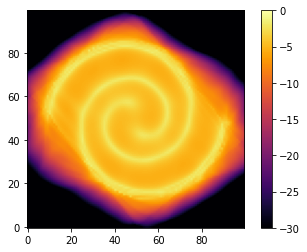

In [ ]:
xv, yv = np.meshgrid(np.linspace(-4,4,100,endpoint=True), np.linspace(-4,4,100,endpoint=True))
x = np.zeros((10000, 2), dtype=np.float32)
x[:,0] = xv.flatten()
x[:,1] = yv[::-1].flatten()

logp_field = model_spiral.evaluate_density(torch.tensor(x))

logp_field = logp_field.reshape(100,100)

#this is the same thing as below with the scatter
plt.imshow(logp_field, cmap='inferno', vmin=-30, vmax=0, origin='lower')
plt.colorbar()
plt.show()

<span style="color:blue"> <i> 7. Create samples by firstly sample latent variables from standard Gaussian using torch.randn(nsample, ndim), and then transform the latent variables to data space using sample = model.inverse(latent)[0]. Make a scatter plot of the samples. Do they look similar to the data? </i></span>

In [ ]:
nsample = 10000
ndim = 2

latent = torch.randn(nsample, ndim)
sample = model_spiral.inverse(latent)[0]

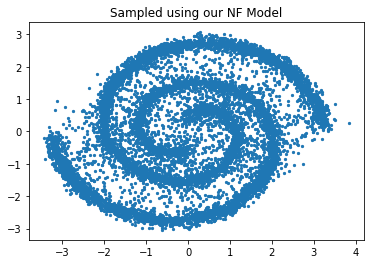

Wow! Yes we see that the resampling from the NF model inverse allows us to recreate the original data


In [ ]:
plt.title("Sampled using our NF Model")
plt.scatter(sample[:,0], sample[:,1], s=5)
plt.show()

print("Wow! Yes we see that the resampling from the NF model inverse allows us to recreate the original data")

We have applied GIS to 1D and 2D toy exampels. Now let's look at a real-world dataset. The HEPMASS dataset (https://archive.ics.uci.edu/ml/datasets/HEPMASS) is one of the standard dataset for testing the performance of density estimation models. This dataset comes from particle collisions in high-energy physics experiments, with data dimensionality 21. Run the below cell to load in HEPMASS dataset. The data has already been preprocessed. The original dataset has 315123 training data. In this question we only use 10000 of them. The validation and test set are kept the same as the original dataset. 

In [ ]:
data_train = np.load('/content/drive/My Drive/P188_288/P188_288_Project3/HEPMASS_train.npy')
data_validate = np.load('/content/drive/My Drive/P188_288/P188_288_Project3/HEPMASS_validate.npy')
data_test = np.load('/content/drive/My Drive/P188_288/P188_288_Project3/HEPMASS_test.npy')

<span style="color:blue"> <i> 8. Apply GIS to the HEPMASS dataset, and print the mean logp of training, validation and test data. Model the same dataset with Kernel Density Estimation (KDE) using sklearn.neighbors.KernelDensity. Find the optimal bandwidth of KDE kernels that maximizes the mean logp of validation set. Print the mean logp of training, validation and test data from KDE. Which method gives you better results? 

You could use a GPU in this question by going to Edit -> Notebook Settings -> Hardware accelerator -> GPU -> SAVE. If GPU is enabled, the model returned by GIS function will be on GPU. Before calculating mean logp, you should either move the model to CPU by doing model = model.cpu(), or move the data to GPU by doing data = data.cuda(). </i></span>

In [ ]:
data_train = torch.tensor(data_train)
data_validate = torch.tensor(data_validate)
data_test = torch.tensor(data_test)

model=GIS(data_train, data_validate)

model = model.cpu()

In [ ]:
logp_train = model.evaluate_density(data_train)
logp_validate = model.evaluate_density(data_validate)
logp_test = model.evaluate_density(data_test)

In [ ]:
print('GIS:')
print('Mean logp for training data:', np.mean(logp_train.numpy()))
print('Mean logp for validation data:', np.mean(logp_validate.numpy()))
print('Mean logp for test data:', np.mean(logp_test.numpy()))

GIS:
Mean logp for training data: -19.35387
Mean logp for validation data: -20.928804
Mean logp for test data: -20.92873


In [ ]:
from sklearn.neighbors import KernelDensity

bandwidths = [0.1, 0.5, 1.0, 2.0, 3.0]
# bandwidths = [0.01, 0.05, 0.1]
mean_logps = []
for i, b in enumerate(bandwidths):
  kde = KernelDensity(kernel='gaussian', bandwidth=b).fit(data_train)
  mean_logps.append(np.mean(kde.score_samples(data_validate)))

print(mean_logps)

[-201.6327729928397, -28.58551861585136, -30.196828620378156, -38.069661182726186, -44.46649983686292]


In [ ]:
print("Optimal Bandwidth appears to be 0.5")
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data_train)

mean_logp_train = np.mean(kde.score_samples(data_train))
mean_logp_validate = np.mean(kde.score_samples(data_validate))
mean_logp_test = np.mean(kde.score_samples(data_test))

Optimal Bandwidth appears to be 0.5


In [ ]:
print('KDE with optimal bandwidth:')
print('Mean logp for training data:', mean_logp_train)
print('Mean logp for validation data:', mean_logp_validate)
print('Mean logp for test data:', mean_logp_test)

KDE with optimal bandwidth:
Mean logp for training data: -13.951764326154619
Mean logp for validation data: -28.58551861585136
Mean logp for test data: -28.56243472402861


In [202]:
print("It appears the KDE gives us a lower logp value but we want to optimize logP so it appears GIS is better than KDE.")

It appears the KDE gives us a lower logp value but we want to optimize logP so it appears GIS is better than KDE.


GIS iteratively maps the data to latent variables $z$ which follow Gaussian distribution. The mapping is invertible, so another way to build the NF is to start from latent Gaussian variables $z$, and then iteratively maps them to data. This model learns the mapping in the opposite direction of GIS, so we name it SIG (Sliced Iterative Generator). While GIS is good at density estimation, SIG normally gives samples with better quanlity in high dimensions. In the next question you will train SIG on MNIST dataset and then generate some samples of hand written digits.


<span style="color:blue"> <i> 9. Follow the instructions below and use SIG to model the MNIST dataset. Plot any 5 of your test samples. Then use the same latent variable and plot the corresponding sample for 0, 10, 20, 50 and 100 iterations. Make sure that you use a GPU in this question by going to Edit -> Notebook Settings -> Hardware accelerator -> GPU -> SAVE. </i></span>

1.   Load in data: data_train, data_test = load_data_mnist()
2.   Data preprocessing: data = preprocess(data)
3.   Define the model: model = SIT(ndim=784).requires_grad_(False)
4.   Create 60k Gaussian samples for training: sample = torch.randn(nsample, ndim). Create 100 Gaussian samples for test (sample_test).
5.   Apply 100 iterations. To add one iteration, do 

     model, sample, sample_test = add_one_layer_inverse(model, data_train, sample, n_component, nsample_wT, nsample, sample_test=sample_test, batchsize=batchsize).

     Set hyperparameters n_component=56, nsample_wT=60000, nsample=60000.

     Set batchsize=10000 to prevent out of memory issue.
6.   Plot any 5 of your test samples. You could transform the sample_test to images using: sample_test_image = toimage(sample_test, shape=[28,28]). 
7.   Generate a random latent variable using torch.randn(nsample, ndim). Plot the corresponding sample for 0, 10, 20, 50 and 100 iterations. For example, to apply 20 iterations on the latent variable, do sample_20iter = model.inverse(latent, end=-20)[0]. Note that you should use the same latent variable for generating these 5 samples.

In [ ]:
from load_data import load_data_mnist
from SINF import SINF
from SIG import add_one_layer_inverse, preprocess, toimage

In [ ]:
data_train_MNIST, data_test_MNIST = load_data_mnist()
data_train_MNIST = preprocess(data_train_MNIST)
data_test_MNIST = preprocess(data_test_MNIST)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /global/scratch/biwei/data/MNIST/raw/train-images-idx3-ubyte.gz to /global/scratch/biwei/data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /global/scratch/biwei/data/MNIST/raw/train-labels-idx1-ubyte.gz to /global/scratch/biwei/data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /global/scratch/biwei/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /global/scratch/biwei/data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /global/scratch/biwei/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /global/scratch/biwei/data/MNIST/raw



./SIG_GIS/SIG.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data).float().reshape(len(data), -1)


In [ ]:
model = SINF(ndim=784).requires_grad_(False)

sample = torch.randn(60000, 784)
sample_test = torch.randn(100, 784)

K=56
nsample_A=60000
nsample=60000
batchsize=10000

for i in range(100):  
  model, sample, sample_test = add_one_layer_inverse(model, data_train_MNIST, sample, K, nsample_A, nsample, sample_test=sample_test, batchsize=batchsize)

./SIG_GIS/SINF.py:494: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1937.)
  Q, R = torch.qr(ATi)


Fit A: Time: 32.014185546875 Wasserstein Distance: [14.947800636291504, 7.232400417327881, 5.7534074783325195, 5.351051330566406, 3.611776351928711, 3.5933878421783447, 3.4481201171875, 3.4426352977752686, 3.3681013584136963, 3.3316187858581543, 3.279667377471924, 3.265122413635254, 2.929501533508301, 2.8495724201202393, 2.7802162170410156, 2.7628912925720215, 2.6423423290252686, 2.630824565887451, 2.5756165981292725, 2.5036301612854004, 2.3636794090270996, 2.2619388103485107, 2.184676170349121, 1.987809658050537, 1.9444061517715454, 1.9414682388305664, 1.906611442565918, 1.8695546388626099, 1.85462486743927, 1.8069963455200195, 1.7876585721969604, 1.5181199312210083, 1.4724395275115967, 1.4349963665008545, 1.3719005584716797, 1.310240626335144, 1.3096319437026978, 1.2435486316680908, 1.1676850318908691, 1.1656053066253662, 1.0708324909210205, 1.052398681640625, 1.0422362089157104, 0.9507735371589661, 0.946512758731842, 0.9317280054092407, 0.9210811257362366, 0.9142491817474365, 0.9000

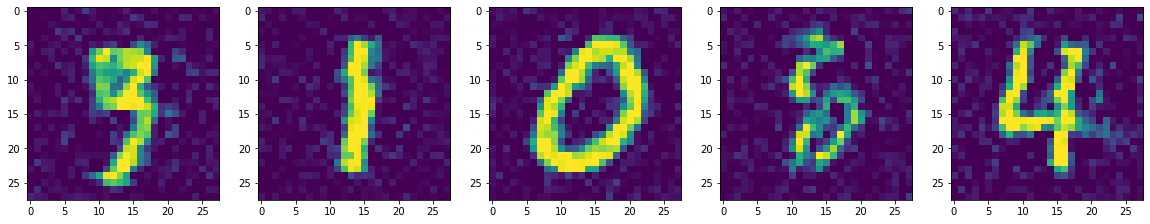

In [ ]:
sample_test_image = toimage(sample_test, shape=[28,28])

f, axes = plt.subplots(1,5, figsize=(20,4))
for i, ax in enumerate(axes):
  ax.imshow(sample_test_image[i,:,:])

plt.show()

In [ ]:
print(nsample)
print(len(model.layer))
latent = torch.randn(nsample,784)

sample_0iter = model.inverse(latent, end=-0)[0]
sample_10iter = model.inverse(latent, end=-10)[0]
sample_20iter = model.inverse(latent,end=-20)[0]
sample_50iter = model.inverse(latent, end=-50)[0]
sample_100iter = model.inverse(latent, end=-100)[0]


60000
100


In [ ]:
sample_0iter = model.inverse(latent, end=-1)[0]

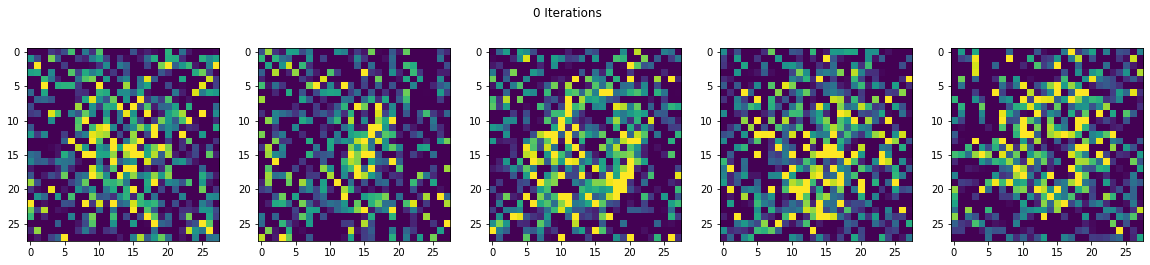

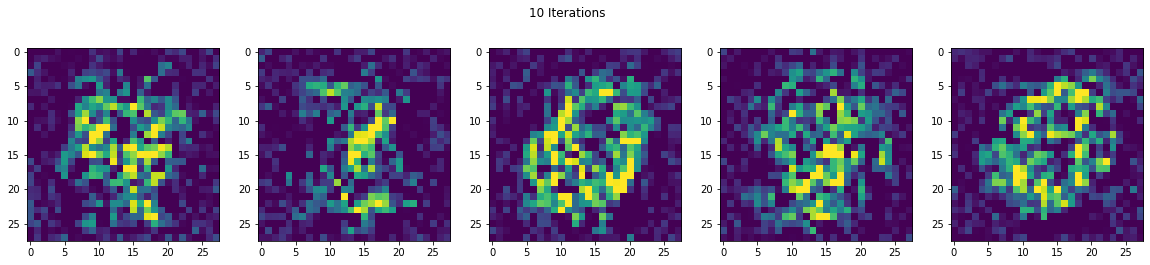

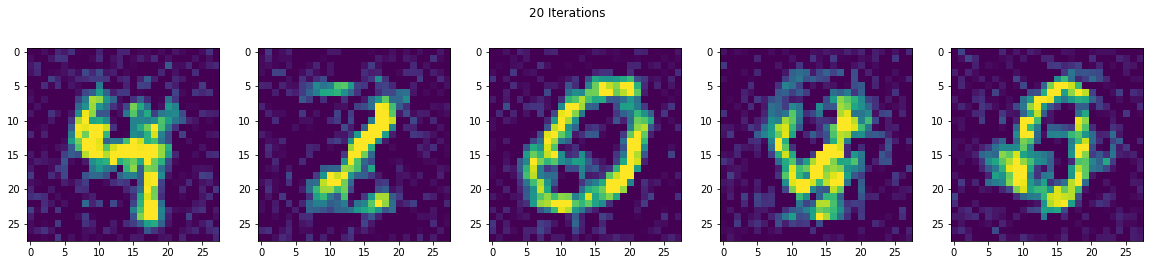

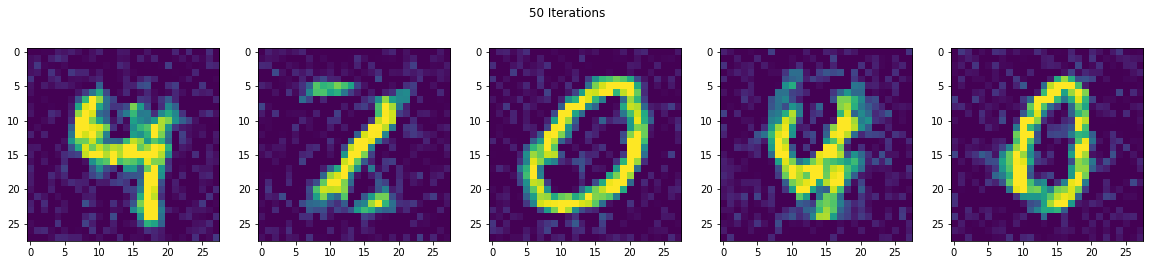

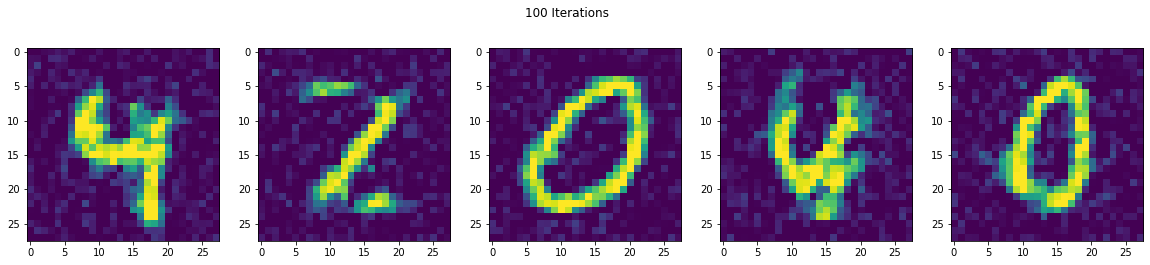

In [ ]:
sample_sample_0iter_image = toimage(sample_0iter, shape=[28,28])

f, axes = plt.subplots(1,5, figsize=(20,4))
f.suptitle("0 Iterations")
for i, ax in enumerate(axes):
  ax.imshow(sample_sample_0iter_image[i,:,:])

plt.show()

sample_sample_10iter_image = toimage(sample_10iter, shape=[28,28])

f, axes = plt.subplots(1,5, figsize=(20,4))
f.suptitle("10 Iterations")
for i, ax in enumerate(axes):
  ax.imshow(sample_sample_10iter_image[i,:,:])

plt.show()

sample_sample_20iter_image = toimage(sample_20iter[0], shape=[28,28])

f, axes = plt.subplots(1,5, figsize=(20,4))
f.suptitle("20 Iterations")
for i, ax in enumerate(axes):
  ax.imshow(sample_sample_20iter_image[i,:,:])

plt.show()

sample_sample_50iter_image = toimage(sample_50iter, shape=[28,28])

f, axes = plt.subplots(1,5, figsize=(20,4))
f.suptitle("50 Iterations")
for i, ax in enumerate(axes):
  ax.imshow(sample_sample_50iter_image[i,:,:])

plt.show()

sample_sample_100iter_image = toimage(sample_100iter, shape=[28,28])

f, axes = plt.subplots(1,5, figsize=(20,4))
f.suptitle("100 Iterations")
for i, ax in enumerate(axes):
  ax.imshow(sample_sample_100iter_image[i,:,:])

plt.show()

In [ ]:
#save the model for future use
torch.save(model, '/content/drive/My Drive/P188_288/P188_288_Project3/SIG')

# #load the model
# model = torch.load('/content/drive/My Drive/P188_288/P188_288_Project3/SIG')

The samples should be pretty noisy, but you should be able tell which digits they are. To get better samples, you need to use patch-based modeling, which takes advantage of the fact that neighboring pixels in images have stronger correlations than pixels that are far away. For more details on patch-based modeling, see https://arxiv.org/abs/2007.00674 .

<span style="color:blue"> <i> 10. Follow the instruction below and add 100 more patch-based iterations to SIG (this takes about 1.5 h). Plot the same 5 test samples as Q9 part 6. Do they look better now? </i></span>

To add one patch-based iteration, do 

model, sample, sample_test = add_one_layer_inverse(model, data_train, sample, n_component, nsample_wT, nsample, sample_test=sample_test, batchsize=batchsize, layer_type='patch', shape=[28,28,1], kernel=kernel, shift=shift).

For the first 50 iterations, set n_component=28, kernel=[14,14,1], shift=torch.randint(14, (2,)).tolist() (random shift for each iteration)

For the next 30 iterations, set  n_component=14, kernel=[7,7,1], shift=torch.randint(7, (2,)).tolist() (random shift for each iteration)

For the last 30 iterations, set  n_component=8, kernel=[4,4,1], shift=torch.randint(4, (2,)).tolist() (random shift for each iteration)

The other hyperparameters are the same as Q9.

In [ ]:
import time

In [ ]:

start = time.time()
for i in range(100):
  iter_prev = time.time()

  if i < 50:
    K = 28
    kernel=[14,14,1]
    shift=torch.randint(14, (2,)).tolist() 
    model, sample, sample_test = add_one_layer_inverse(model, data_train_MNIST, sample, K, nsample_A, 
                                                   nsample, sample_test=sample_test, batchsize=batchsize, 
                                                   layer_type='patch', shape=[28,28,1], kernel=kernel, shift=shift)
  elif i >= 50 and i < 80:
    K = 14
    kernel=[7,7,1]
    shift=torch.randint(7, (2,)).tolist() 
    model, sample, sample_test = add_one_layer_inverse(model, data_train_MNIST, sample, K, nsample_A, 
                                                   nsample, sample_test=sample_test, batchsize=batchsize, 
                                                   layer_type='patch', shape=[28,28,1], kernel=kernel, shift=shift)
    
  elif i >= 80:
    K = 8
    kernel=[4,4,1]
    shift=torch.randint(4, (2,)).tolist() 
    model, sample, sample_test = add_one_layer_inverse(model, data_train_MNIST, sample, K, nsample_A, 
                                                   nsample, sample_test=sample_test, batchsize=batchsize, 
                                                   layer_type='patch', shape=[28,28,1], kernel=kernel, shift=shift)
    
  iter_next = time.time()
  print(str(i) + " layer took " + str(iter_next - iter_prev) + 's')

finish = time.time()

print("it took " + str(finish-start) + "s")


./SIG_GIS/SINF.py:716: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self.Nkernel_H = (self.shape[0] // self.kernel[0]).item()
./SIG_GIS/SINF.py:717: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self.Nkernel_W = (self.shape[1] // self.kernel[1]).item()
./SIG_GIS/SINF.py:718: UserWarning: __floordiv__ is deprecated, and its behavior w

Fit A: Time: 53.72716796875 Wasserstein Distance: [[0.29865148663520813, 0.1590944230556488, 0.07243219763040543, 0.052530162036418915, 0.04780369997024536, 0.04733404889702797, 0.046936675906181335, 0.04671314358711243, 0.040770746767520905, 0.03958485648036003, 0.039054255932569504, 0.03607197850942612, 0.03579137474298477, 0.0355672687292099, 0.035313792526721954, 0.03326675295829773, 0.031549643725156784, 0.031310636550188065, 0.030031125992536545, 0.028768621385097504, 0.0267359409481287, 0.02672373317182064, 0.02413276955485344, 0.022887442260980606, 0.02235381305217743, 0.02148887701332569, 0.02063440904021263, 0.015384470112621784], [0.20486238598823547, 0.1544484943151474, 0.14549949765205383, 0.14463992416858673, 0.14192484319210052, 0.13822966814041138, 0.13564245402812958, 0.11915574222803116, 0.11418905109167099, 0.11359462141990662, 0.11080800741910934, 0.10714942216873169, 0.09108739346265793, 0.09105870872735977, 0.0858299657702446, 0.08578222244977951, 0.08547621965408

In [ ]:
#save the model for future use
# torch.save(model, '/content/drive/My Drive/P188_288/P188_288_Project3/SIG')

# #load the model
model = torch.load('/content/drive/My Drive/P188_288/P188_288_Project3/SIG_shared')

In [ ]:
print(len(model.layer))
nsample=60000
latent = torch.randn(nsample,784)

sample_full = model.inverse(latent, end=-200)[0]

200


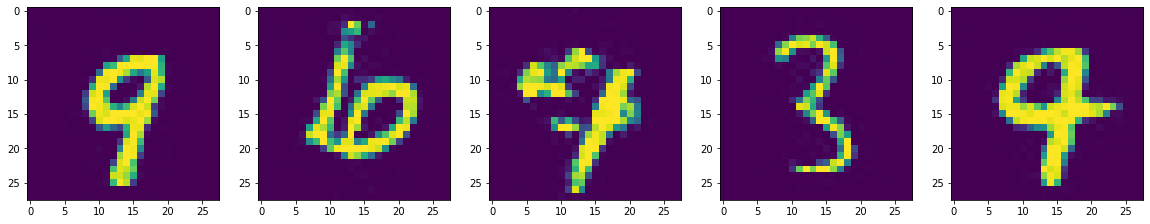

They look better in the sense that the lines are much more defined and the noise is gone, they look a little weird though


In [ ]:
sample_full_image = toimage(sample_full, shape=[28,28])

f, axes = plt.subplots(1,5, figsize=(20,4))
for i, ax in enumerate(axes):
  ax.imshow(sample_full_image[i,:,:])

plt.show()

In [204]:
print("They look much better after the 200 iterations!")

They look much better after the 200 iterations!


***